# Setup

Required data files:
* qced.h5ad
* Concat_InferCNV.pkl
* inferCNVgeneName.txt
* aneuploidy_events.csv

In [1]:
from scipy.stats import spearmanr

import os
import pickle

import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from IPython.display import display

pd.options.display.max_columns = 40

In [3]:
with open('/data/aneuploidy/Concat_InferCNV.pkl', 'rb') as f:
    infercnv_raw = pickle.load(f)
    
display(infercnv_raw)

GACAGCCGTCATGACT-1-0-0  GACGTTAAGACATCCT-1-0-0  \
LINC01409                 1.170393                1.001149   
LINC01128                 1.170393                1.001149   
NOC2L                     1.170393                1.001149   
ISG15                     1.170393                1.001149   
C1orf159                  1.170393                1.001149   
...                            ...                     ...   
LYSMD4                         NaN                     NaN   
FOSB                           NaN                     NaN   
HLA-DQA1                       NaN                     NaN   
AC016065.1                     NaN                     NaN   
UBALD1                         NaN                     NaN   

            CGGTCAGTCATGACAC-1-0-0  CGGGACTGTACGCTTA-1-0-0  \
LINC01409                 1.076903                1.001149   
LINC01128                 1.077569                1.001149   
NOC2L                     1.078540                1.001149   
ISG15                     1.078392                1.001149   
C1orf159                  1.078538                1.001149   
...                            ...                     ...   
LYSMD4                         NaN                     NaN   
FOSB                           NaN                     NaN   
HLA-DQA1                       NaN                     NaN   
AC016065.1                     NaN                     NaN   
UBALD1                         NaN                     NaN   

            AAACGCTTCGGTATGT-1-0-0  AACGGGAAGACGCAGT-1-0-0  \
LINC01409                 1.001149                1.001149   
LINC01128                 1.001149                1.001149   
NOC2L                     1.001149                1.001149   
ISG15                     1.001149                1.001149   
C1orf159                  1.001149                1.001149   
...                            ...                     ...   
LYSMD4                         NaN                     NaN   
FOSB                           NaN                     NaN   
HLA-DQA1                       NaN                     NaN   
AC016065.1                     NaN                     NaN   
UBALD1                         NaN                     NaN   

            CTGTGAAGTGGGAGAG-1-0-0  GAGTCTAGTCTGTGAT-1-0-0  \
LINC01409                 1.170393                1.001149   
LINC01128                 1.170393                1.001149   
NOC2L                     1.170393                1.001149   
ISG15                     1.169175                1.001149   
C1orf159                  1.165599                1.001149   
...                            ...                     ...   
LYSMD4                         NaN                     NaN   
FOSB                           NaN                     NaN   
HLA-DQA1                       NaN                     NaN   
AC016065.1                     NaN                     NaN   
UBALD1                         NaN                     NaN   

            GCGATCGGTTACGCCG-1-0-0  GGGATGAAGGAAACGA-1-0-0  \
LINC01409                 1.123718                1.170393   
LINC01128                 1.122497                1.170393   
NOC2L                     1.121060                1.170393   
ISG15                     1.119919                1.170393   
C1orf159                  1.117622                1.170393   
...                            ...                     ...   
LYSMD4                         NaN                     NaN   
FOSB                           NaN                     NaN   
HLA-DQA1                       NaN                     NaN   
AC016065.1                     NaN                     NaN   
UBALD1                         NaN                     NaN   

            AGACCCGGTAAGACCG-1-0-0  AGGACGATCAGTGATC-1-0-0  \
LINC01409                 1.084383                1.141192   
LINC01128                 1.083491                1.140084   
NOC2L                     1.082955                1.138779   
ISG15                     1.082642     

In [4]:
infercnv_raw.dropna(inplace = True)
display(infercnv_raw)

GACAGCCGTCATGACT-1-0-0  GACGTTAAGACATCCT-1-0-0  \
LINC01409                 1.170393                1.001149   
LINC01128                 1.170393                1.001149   
NOC2L                     1.170393                1.001149   
ISG15                     1.170393                1.001149   
C1orf159                  1.170393                1.001149   
...                            ...                     ...   
SCO2                      1.001149                1.001149   
TYMP                      1.001149                1.001149   
CHKB                      1.001149                1.001149   
ARSA                      1.001149                1.001149   
AL592183.1                1.170393                1.170393   

            CGGTCAGTCATGACAC-1-0-0  CGGGACTGTACGCTTA-1-0-0  \
LINC01409                 1.076903                1.001149   
LINC01128                 1.077569                1.001149   
NOC2L                     1.078540                1.001149   
ISG15                     1.078392                1.001149   
C1orf159                  1.078538                1.001149   
...                            ...                     ...   
SCO2                      1.001149                1.001149   
TYMP                      1.001149                1.001149   
CHKB                      1.001149                1.001149   
ARSA                      1.001149                1.001149   
AL592183.1                1.170393                1.170393   

            AAACGCTTCGGTATGT-1-0-0  AACGGGAAGACGCAGT-1-0-0  \
LINC01409                 1.001149                1.001149   
LINC01128                 1.001149                1.001149   
NOC2L                     1.001149                1.001149   
ISG15                     1.001149                1.001149   
C1orf159                  1.001149                1.001149   
...                            ...                     ...   
SCO2                      1.001149                1.001149   
TYMP                      1.001149                1.001149   
CHKB                      1.001149                1.001149   
ARSA                      1.001149                1.001149   
AL592183.1                1.170393                1.170393   

            CTGTGAAGTGGGAGAG-1-0-0  GAGTCTAGTCTGTGAT-1-0-0  \
LINC01409                 1.170393                1.001149   
LINC01128                 1.170393                1.001149   
NOC2L                     1.170393                1.001149   
ISG15                     1.169175                1.001149   
C1orf159                  1.165599                1.001149   
...                            ...                     ...   
SCO2                      1.090248                1.142419   
TYMP                      1.090899                1.146816   
CHKB                      1.091488                1.151477   
ARSA                      1.092130                1.155650   
AL592183.1                0.894849                1.170393   

            GCGATCGGTTACGCCG-1-0-0  GGGATGAAGGAAACGA-1-0-0  \
LINC01409                 1.123718                1.170393   
LINC01128                 1.122497                1.170393   
NOC2L                     1.121060                1.170393   
ISG15                     1.119919                1.170393   
C1orf159                  1.117622                1.170393   
...                            ...                     ...   
SCO2                      1.001149                1.001149   
TYMP                      1.001149                1.001149   
CHKB                      1.001149                1.001149   
ARSA                      1.001149                1.001149   
AL592183.1                0.915787                0.912282   

            AGACCCGGTAAGACCG-1-0-0  AGGACGATCAGTGATC-1-0-0  \
LINC01409                 1.084383                1.141192   
LINC01128                 1.083491                1.140084   
NOC2L                     1.082955                1.138779   
ISG15                     1.082642     

In [5]:
adata = sc.read_h5ad('/data/aneuploidy/qced.h5ad')
adata

AnnData object with n_obs × n_vars = 204374 × 37001
    obs: 'batch', 'aggr_barcode', 'num_features', 'feature_call', 'num_umis', 'maxUmi1', 'maxUmi2', 'cell_barcode', 'guidePvalue', 'pvalueAssign', 'guides', 'multi_output', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'label', 'SingletorDoublet', '<10_percent_mt', '<10000_total_counts', 'qc_pass', '<100000_total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [6]:
adata.obs['is_singlet'] = (adata.obs['SingletorDoublet'] == 'Singlet')
# adata.obs['qc_pass'] = adata.obs['<=10000counts'] & adata.obs['<=10mito'] & adata.obs['is_singlet']
display(adata.obs[['qc_pass', '<100000_total_counts', '<10_percent_mt', 'is_singlet']].mean())

qc_pass                 0.530684
<100000_total_counts    0.998674
<10_percent_mt          0.806076
is_singlet              0.690450
dtype: float64

In [7]:
def get_guide_umi_counts(record):
    return pd.Series(dict(zip(record['feature_call'].split('|'), record['num_umis'].split('|')))).astype(int)

adata.obsm['guide_umi_counts'] = adata.obs.apply(get_guide_umi_counts, axis = 1).fillna(0).astype(int)
display(adata.obsm['guide_umi_counts'])

ABL1-1  ABL1-2  ABL1-3  ABL1-4  ADA-1  ADA-2  ADA-3  \
aggr_barcode                                                                
AAACCCAAGACATCAA-1-0       0       0       0       0      0      0      0   
AAACCCAAGATGACAT-1-0       0       0       0       0      0      0      0   
AAACCCAAGCGAGTCA-1-0       0       0       0       0      0      0      0   
AAACCCAAGCGCCTCA-1-0       0       0       0       0      0      2      0   
AAACCCAAGTAGCATA-1-0       0       0       0       0      0      0      0   
...                      ...     ...     ...     ...    ...    ...    ...   
TTTGTTGTCAGGACGA-1-5       0       0       0       0      0      0      0   
TTTGTTGTCATTGTTC-1-5       0       0       0       0      0      0      0   
TTTGTTGTCCTTCTTC-1-5       0       0       0       0      0      0      0   
TTTGTTGTCTATCGTT-1-5       0       0       0       0      0      0      0   
TTTGTTGTCTTAAGGC-1-5       0       0       0       0      0      0      0   

                      ADA-4  ADA2-1  ADA2-2  ADA2-3  ADA2-4  AIRE-1  AIRE-2  \
aggr_barcode                                                                  
AAACCCAAGACATCAA-1-0      0       0       0       0       0       0       0   
AAACCCAAGATGACAT-1-0      0       0       0       0       0       0       0   
AAACCCAAGCGAGTCA-1-0      0       0       0       0       0       0       0   
AAACCCAAGCGCCTCA-1-0      0       0       0       0       0       0       3   
AAACCCAAGTAGCATA-1-0      0       0       0       0       0       0       1   
...                     ...     ...     ...     ...     ...     ...     ...   
TTTGTTGTCAGGACGA-1-5      0       0       0       0       0       0       0   
TTTGTTGTCATTGTTC-1-5      0       0       0       0       0       0       0   
TTTGTTGTCCTTCTTC-1-5      0       0       0       0       0       0       0   
TTTGTTGTCTATCGTT-1-5      0       0       0       0       0       0       0   
TTTGTTGTCTTAAGGC-1-5      0       0       0       0       0       0       0   

                      AIRE-3  AIRE-4  ATP7B-1  ATP7B-2  ATP7B-3  ATP7B-4  ...  \
aggr_barcode                                                              ...   
AAACCCAAGACATCAA-1-0       0       0        0        0        0        0  ...   
AAACCCAAGATGACAT-1-0       0       0        0        0        0        0  ...   
AAACCCAAGCGAGTCA-1-0       0       0        0        0        0        0  ...   
AAACCCAAGCGCCTCA-1-0       0       0        0        0        0        0  ...   
AAACCCAAGTAGCATA-1-0       0       0        0        0        0        0  ...   
...                      ...     ...      ...      ...      ...      ...  ...   
TTTGTTGTCAGGACGA-1-5       0       0        0        0        0        0  ...   
TTTGTTGTCATTGTTC-1-5       0       0        0        0        0        0  ...   
TTTGTTGTCCTTCTTC-1-5       0       0        0        0        0        0  ...   
TTTGTTGTCTATCGTT-1-5       1       0        0        0        0        1  ...   
TTTGTTGTCTTAAGGC-1-5       0       0        0        0        0        0  ...   

                      USP22-1  USP22-2  USP22-3  USP22-4  VEGFA-1  VEGFA-2  \
aggr_barcode                                                                 
AAACCCAAGACATCAA-1-0        0        0        0        0        0        0   
AAACCCAAGATGACAT-1-0        0        0        0        0        0        0   
AAACCCAAGCGAGTCA-1-0        0        0        0        0        0        0   
AAACCCAAGCGCCTCA-1-0        0        0        0        0        0        0   
AAACCCAAGTAGCATA-1-0        0        0        0        0        0        0   
...                       ...      ...      ...      ...      ...      ...   
TTTGTTGTCAGGACGA-1-5        0        0        0        0        0        0   
TTTGTTGTCATTGTTC-1-5        0        0        0        1        0        0   
TTTGTTGTCCTTCTTC-1-5        0        0        0        0        0        0   
TTTGTTGTCTATCGTT-1-5        0        0        0        2        0        0   
TT

In [8]:
gene_locs = pd.read_csv('/data/aneuploidy/inferCNVgeneName.txt', sep = '\t', names = ['gene', 'chrom', 'start', 'end'])
gene_to_chrom = gene_locs.set_index('gene')['chrom']
gene_to_loc = gene_locs.set_index('gene')['start']

In [9]:
def parse_target(guide):
    
    TARGET_RENAME_MAP = {'CECR1': 'ADA'}
    
    if guide == 'Multiple Guides':
        return np.nan
    else:
        
        target = guide.split('-')[0]
        
        if target in TARGET_RENAME_MAP:
            return TARGET_RENAME_MAP[target]
        else:
            return target
        
def get_guide_chrom(guide):
    return gene_to_chrom.get(parse_target(guide))

In [10]:
aneuploidy_events = pd.read_csv('/data/aneuploidy/aneuploidy_events.csv', index_col = 0)
display(aneuploidy_events)

chr1_bp_loc  chr1_bp_n  chr1_left  chr1_right  \
aggr_barcode                                                          
AAACCCAAGACATCAA-1-0  245359523.5      917.0   1.003793    0.930004   
AAACCCAAGATGACAT-1-0   15594578.5       82.0   0.894457    0.987968   
AAACCCAAGCGAGTCA-1-0    6087973.5       32.0   0.962678    1.025396   
AAACCCAAGCGCCTCA-1-0    6362527.5       35.0   0.972234    1.024185   
AAACCCAAGTAGCATA-1-0  224371000.5      847.0   1.008535    0.990535   
...                           ...        ...        ...         ...   
TTTGTTGTCAGGACGA-1-5   44707255.0      280.0   0.968793    1.011047   
TTTGTTGTCATTGTTC-1-5   35501652.5      213.0   1.001339    1.000304   
TTTGTTGTCCTTCTTC-1-5   42714376.5      263.0   1.004643    1.011613   
TTTGTTGTCTATCGTT-1-5   18240635.0       93.0   0.878651    1.012951   
TTTGTTGTCTTAAGGC-1-5   64213320.0      353.0   1.021636    1.001499   

                      chr1_left_binary  chr1_right_binary  chr1_left_n  \
aggr_barcode                                                             
AAACCCAAGACATCAA-1-0          0.827887           0.000000        918.0   
AAACCCAAGATGACAT-1-0          0.000000           0.813239         83.0   
AAACCCAAGCGAGTCA-1-0          0.484848           0.953125         33.0   
AAACCCAAGCGCCTCA-1-0          0.611111           1.000000         36.0   
AAACCCAAGTAGCATA-1-0          1.000000           0.851852        848.0   
...                                ...                ...          ...   
TTTGTTGTCAGGACGA-1-5          0.647687           0.891975        281.0   
TTTGTTGTCATTGTTC-1-5          1.000000           0.826573        214.0   
TTTGTTGTCCTTCTTC-1-5          0.924242           1.000000        264.0   
TTTGTTGTCTATCGTT-1-5          0.000000           0.782036         94.0   
TTTGTTGTCTTAAGGC-1-5          0.991525           0.768696        354.0   

                      chr1_right_n  chr1_binary  chr10_bp_loc  chr10_bp_n  \
aggr_barcode                                                                
AAACCCAAGACATCAA-1-0          11.0     0.818084    17479786.0        48.0   
AAACCCAAGATGACAT-1-0         846.0     0.740581      470689.5         0.0   
AAACCCAAGCGAGTCA-1-0         896.0     0.936491    91603853.0       199.0   
AAACCCAAGCGCCTCA-1-0         893.0     0.984930      470689.5         0.0   
AAACCCAAGTAGCATA-1-0          81.0     0.987083      470689.5         0.0   
...                            ...          ...           ...         ...   
TTTGTTGTCAGGACGA-1-5         648.0     0.818084    22318742.5        55.0   
TTTGTTGTCATTGTTC-1-5         715.0     0.866523    18529338.0        50.0   
TTTGTTGTCCTTCTTC-1-5         665.0     0.978471      470689.5         0.0   
TTTGTTGTCTATCGTT-1-5         835.0     0.702906      470689.5         0.0   
TTTGTTGTCTTAAGGC-1-5         575.0     0.853606    13219675.0        32.0   

                      chr10_left  chr10_right  chr10_left_binary  \
aggr_barcode                                                       
AAACCCAAGACATCAA-1-0    0.862473     0.982037                0.0   
AAACCCAAGATGACAT-1-0    1.170393     1.012240                1.0   
AAACCCAAGCGAGTCA-1-0    0.956323     1.001149                0.4   
AAACCCAAGCGCCTCA-1-0    1.001149     1.007036                1.0   
AAACCCAAGTAGCATA-1-0    1.001149     1.004560                1.0   
...                          ...          ...                ...   
TTTGTTGTCAGGACGA-1-5    0.956080     1.015214                0.5   
TTTGTTGTCATTGTTC-1-5    0.869288     1.001339                0.0   
TTTGTTGTCCTTCTTC-1-5    1.001339     1.001339                1.0   
TTTGTTGTCTATCGTT-1-5    1.162725     1.029942                1.0   
TTTGTTGTCTTAAGGC-1-5    0.875613     0.977016                0.0   

                      chr10_right_binary  chr10_left_n  chr10_right_n  \
aggr_barcode                                                            
AAACCCAAGACATCAA-1-0            0.783051          49.0          295.0   
AAACCCAAGATGACAT-1-0         

Done.


(0.0, 10000.0)

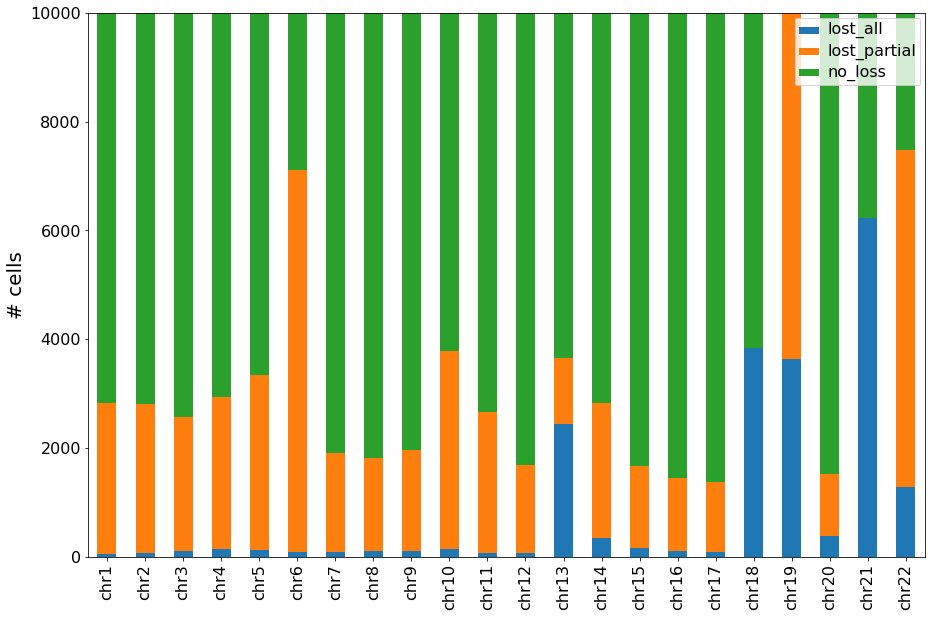

In [11]:
LOSS_FRAC = 0.7
MIN_GENES = 150

for chrom in ('chr%d' % i for i in range(1, 23)):
    
    left_binary = aneuploidy_events['%s_left_binary' % chrom]
    left_n = aneuploidy_events['%s_left_n' % chrom]
    right_binary = aneuploidy_events['%s_right_binary' % chrom]
    right_n = aneuploidy_events['%s_right_n' % chrom]
    total_binary = (left_n * left_binary + right_n * right_binary) / (left_n + right_n)
    
    lost_all = (total_binary <= 1 - LOSS_FRAC)
    lost_left = (left_binary <= 1 - LOSS_FRAC)
    lost_right = (right_binary <= 1 - LOSS_FRAC)
    lost_only_left = lost_left & (~lost_right)
    lost_only_right = lost_right & (~lost_left)
    enough_genes_left = (left_n >= MIN_GENES)
    enough_genes_right = (right_n >= MIN_GENES)
    lost_partial = (lost_only_left & enough_genes_left) | (lost_only_right & enough_genes_right)
    
    event = np.where(lost_partial, 'lost_partial', np.where(lost_all, 'lost_all', 'no_loss'))
    aneuploidy_events['%s_event' % chrom] = event
    
print('Done.')

ax = pd.DataFrame({chrom: aneuploidy_events['%s_event' % chrom].value_counts() for chrom in \
        ('chr%d' % i for i in range(1, 23))}).transpose().fillna(0).astype(int)[['lost_all', 'lost_partial', \
        'no_loss']].plot(kind = 'bar', stacked = True, figsize = (15, 10), ylim = (0, len(aneuploidy_events)), \
        ylabel = '# cells')
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis = 'both', labelsize = 16)
plt.setp(ax.get_legend().get_texts(), fontsize = 16)
ax.set_ylim((0, 10000))

In [38]:
aneuploidy_events.to_csv('/data/aneuploidy/aneuploidy_events_v2.csv')

In [12]:
infercnv_raw['chrom'] = list(map(get_guide_chrom, infercnv_raw.index))
infercnv_raw['chrom'].value_counts()

chr1          928
chr2          654
chr19         594
chr17         552
chr3          530
chr11         511
chr6          507
chr12         506
chr7          429
chr5          429
chr16         411
chr9          366
chr10         343
chr4          331
chr14         319
chr8          308
chr15         301
chr20         239
chr22         213
chr13         178
chr18         141
chr21          95
GL000219.1      1
Name: chrom, dtype: int64

# Inspect breakpoints and events

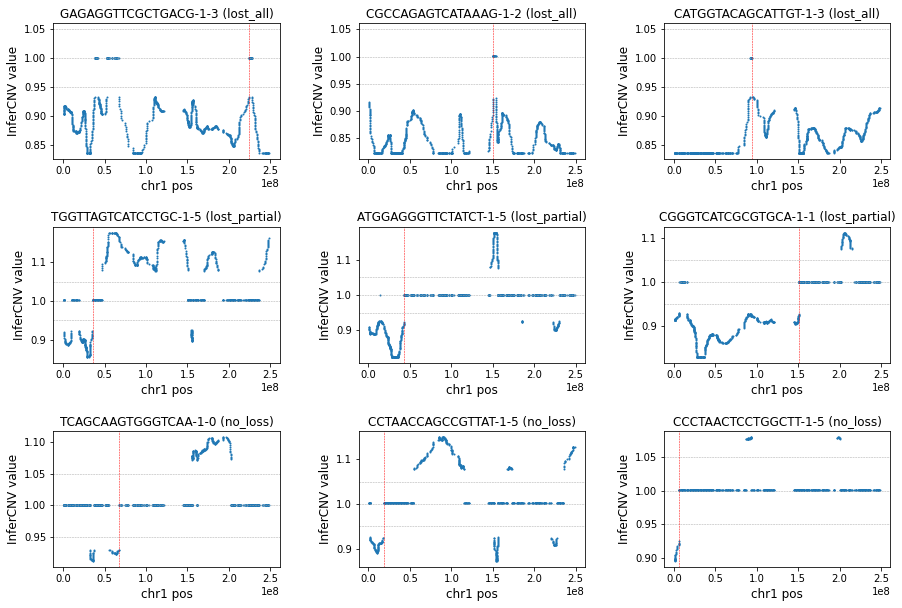

In [36]:
infercnv_chroms = infercnv_raw.index.map(gene_to_chrom)

chrom = 'chr1'
cell_barcodes = np.concatenate([event_records.sample(3).index.values for _, event_records in \
        aneuploidy_events.groupby('%s_event' % chrom)])

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
fig.subplots_adjust(hspace = 0.5, wspace = 0.35)

for ax, cell_barcode in zip(axes.flatten(), cell_barcodes):
    
    cell_chrom_event = aneuploidy_events.loc[cell_barcode, '%s_event' % chrom]
    cell_chrom_breakpoint = aneuploidy_events.loc[cell_barcode, '%s_bp_loc' % chrom]

    infercnv_cell_chrom = infercnv_raw.loc[infercnv_chroms == chrom, cell_barcode + '-0']
    infercnv_cell_chrom_by_pos = pd.Series(infercnv_cell_chrom.values, infercnv_cell_chrom.index.map(gene_to_loc))\
            .sort_index()

    ax.axhline(1, color = '#aaaaaa', linestyle = '--', linewidth = 0.5)
    ax.axhline(1.05, color = '#aaaaaa', linestyle = '--', linewidth = 0.5)
    ax.axhline(0.95, color = '#aaaaaa', linestyle = '--', linewidth = 0.5)
    ax.scatter(infercnv_cell_chrom_by_pos.index, infercnv_cell_chrom_by_pos.values, s = 1)
    ax.axvline(cell_chrom_breakpoint, color = 'red', linestyle = '--', linewidth = 0.5)
    ax.set_xlabel('%s pos' % chrom, fontsize = 12)
    ax.set_ylabel('InferCNV value', fontsize = 12)
    ax.set_title('%s (%s)' % (cell_barcode, cell_chrom_event))

# Target vs. loss analysis

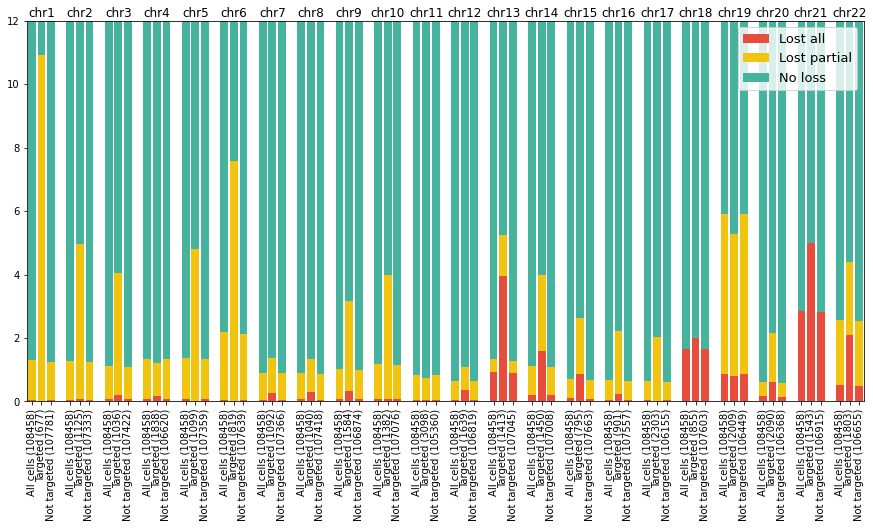

In [12]:
GUIDE_PVAL_CUTOFF = 0.05
CELL_QC_MASK = adata.obs['qc_pass']

cell_guides = pd.Series(np.where(adata.obs['guidePvalue'] < GUIDE_PVAL_CUTOFF, adata.obs['guides']\
            .apply(lambda raw_guides: raw_guides.split('|')[0]).astype(str).apply(lambda value: {value}), set()), \
            index = adata.obs.index)
cell_targeted_chroms = cell_guides.apply(lambda guides: {chrom for chrom in map(get_guide_chrom, guides) if chrom \
        is not None})

cell_mask = CELL_QC_MASK
assert (aneuploidy_events.index == adata.obs.index).all()

target_status_filters = [
    # name, function
    ('All cells', lambda chrom: pd.Series(True, index = cell_targeted_chroms.index)),
    ('Targeted', lambda chrom: cell_targeted_chroms.apply(lambda chroms: chrom in chroms)),
    ('Not targeted', lambda chrom: cell_targeted_chroms.apply(lambda chroms: chrom not in chroms)),
]

chroms = ['chr%d' % i for i in range(1, 23)]

chrom_loss_counts_per_target_status = {filter_name: pd.DataFrame({chrom: aneuploidy_events.loc[cell_mask & \
        filter_function(chrom), '%s_event' % chrom].value_counts() for chrom in chroms}).transpose().fillna(0)\
        .astype(int) for filter_name, filter_function in target_status_filters}

YLIM = 12

LOSS_STATUS_COLORS = {
    'lost_all': '#E74C3C',
    'lost_partial': '#F1C40F',
    'no_loss': '#45B39D',
}

fig, ax = plt.subplots(figsize = (15, 7))
x_base = np.arange(0, 4 * len(chroms), 4)

for i, (target_status, chrom_loss_counts) in enumerate(chrom_loss_counts_per_target_status.items()):
    
    chrom_loss_pct = 100 * chrom_loss_counts.div(chrom_loss_counts.sum(axis = 1), axis = 0)
    
    x = x_base + i
    y_bottom = np.zeros_like(x, dtype = float)
    
    for loss_status in LOSS_STATUS_COLORS.keys():
        y = chrom_loss_pct[loss_status].values
        color = LOSS_STATUS_COLORS[loss_status]
        label = loss_status.replace('_', ' ').capitalize() if i == 0 else None
        ax.bar(x, y, bottom = y_bottom, color = color, label = label)
        y_bottom += y

ax.set_xlim((-0.5, x_base.max() + 2.5))
ax.set_ylim((0, YLIM))
ax.set_xticks([i for i in range(4 * len(chroms)) if i % 4 != 3])
ax.set_xticklabels(['%s (%d)' % (target_status, chrom_loss_counts.loc[chrom].sum()) for chrom in chroms \
        for target_status, chrom_loss_counts in chrom_loss_counts_per_target_status.items()], rotation = 90)
ax.legend(fontsize = 13, loc = 'upper right')

for i, chrom in enumerate(chroms):
    ax.text(4 * i + 1, 1.01 * YLIM, chrom, ha = 'center', fontsize = 12)

In [141]:
mkdir /data/aneuploidy/chrom_loss_counts_per_target_status

In [142]:
for target_status, chrom_loss_counts in chrom_loss_counts_per_target_status.items():
    chrom_loss_counts.to_csv(os.path.join('/data/aneuploidy/chrom_loss_counts_per_target_status', '%s.csv' % \
            target_status.lower().replace(' ', '_')))
    
print('Done.')

Done.


Total cells: 108458
31591 cells are targeted, 26223 have a loss event
Total enrichment: 3.826 (across 5198 cells)


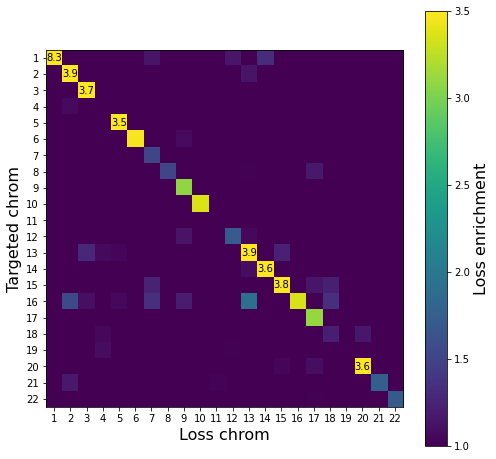

In [12]:
ASSIGN_GUIDE_BY_DOMINANCE = True
GUIDE_PVAL_CUTOFF = 0.05
GUIDE_MIN_UMIS = 3
LOSS_EVENT_LABELS = {'lost_all', 'lost_partial'}
CELL_QC_MASK = adata.obs['qc_pass']
VMIN, VMAX = 1.0, 3.5

CHROMS = ['chr%d' % i for i in range(1, 23)]

if ASSIGN_GUIDE_BY_DOMINANCE:
    cell_guides = pd.Series(np.where(adata.obs['guidePvalue'] < GUIDE_PVAL_CUTOFF, adata.obs['guides']\
            .apply(lambda raw_guides: raw_guides.split('|')[0]).astype(str).apply(lambda value: {value}), set()), \
            index = adata.obs.index)
else:
    cell_guides = (adata.obsm['guide_umi_counts'] >= GUIDE_MIN_UMIS).apply(lambda cell_mask: \
            set(cell_mask.index[cell_mask]), axis = 1)
    
cell_targeted_chroms = cell_guides.apply(lambda guides: {chrom for chrom in map(get_guide_chrom, guides) if chrom \
        is not None})

target_mask_per_chrom = pd.DataFrame({chrom: cell_targeted_chroms.apply(lambda cell_chroms: chrom in cell_chroms) for \
        chrom in CHROMS})
loss_mask_per_chrom = pd.DataFrame({chrom: aneuploidy_events['%s_event' % chrom].isin(LOSS_EVENT_LABELS) for \
        chrom in CHROMS})

cell_mask = CELL_QC_MASK
target_mask_per_chrom = target_mask_per_chrom[cell_mask]
loss_mask_per_chrom = loss_mask_per_chrom[cell_mask]
print('Total cells: %d' % cell_mask.sum())
print('%d cells are targeted, %s have a loss event' % (target_mask_per_chrom.any(axis = 1).sum(), \
        loss_mask_per_chrom.any(axis = 1).sum()))

enrch_per_cell = (target_mask_per_chrom & loss_mask_per_chrom).mean(axis = 1) / \
        (target_mask_per_chrom.mean(axis = 1) * loss_mask_per_chrom.mean(axis = 1))
total_enrch = enrch_per_cell.mean()
print('Total enrichment: %.3f (across %d cells)' % (total_enrch, pd.notnull(enrch_per_cell).sum()))

loss_per_target = pd.DataFrame(np.nan, index = CHROMS, columns = CHROMS)
loss_enrch_per_target = pd.DataFrame(np.nan, index = CHROMS, columns = CHROMS)

for target_chrom in CHROMS:
    
    chrom_target_mask = target_mask_per_chrom[target_chrom]
    
    for loss_chrom in CHROMS:
        chrom_loss_mask = loss_mask_per_chrom[loss_chrom]
        loss_per_target.loc[target_chrom, loss_chrom] = chrom_loss_mask[chrom_target_mask].mean()
        loss_enrch_per_target.loc[target_chrom, loss_chrom] = (chrom_target_mask & chrom_loss_mask).mean() / \
                (chrom_target_mask.mean() * chrom_loss_mask.mean())
        
fig, ax = plt.subplots(figsize = (8, 8))
heatmap = ax.imshow(loss_enrch_per_target, vmin = VMIN, vmax = VMAX)
ax.set_xticks(np.arange(len(CHROMS)))
ax.set_xticklabels(np.arange(len(CHROMS)) + 1)
ax.set_xlabel('Loss chrom', fontsize = 16)
ax.set_yticks(np.arange(len(CHROMS)))
ax.set_yticklabels(np.arange(len(CHROMS)) + 1)
ax.set_ylabel('Targeted chrom', fontsize = 16)
colorbar = fig.colorbar(heatmap)
colorbar.set_label('Loss enrichment', fontsize = 16)

for i in range(len(CHROMS)):
    for j in range(len(CHROMS)):
        if loss_enrch_per_target.iloc[i, j] > VMAX:
            ax.text(i, j, '%.1f' % loss_enrch_per_target.iloc[i, j], ha = 'center', va = 'center')

In [13]:
from statsmodels.stats.proportion import proportion_confint

def get_unique(elements):
    if len(elements) == 0:
        return np.nan
    else:
        element, = set(elements)
        return element
    
guide_per_cell = cell_guides.apply(get_unique)
n_cells_per_guide = {}
n_chrom_loss_per_guide = {}

for guide, guide_cells in guide_per_cell.groupby(guide_per_cell):
    guide_loss_mask_per_chrom = loss_mask_per_chrom.reindex(guide_cells.index).dropna()
    n_cells_per_guide[guide] = len(guide_loss_mask_per_chrom)
    n_chrom_loss_per_guide[guide] = guide_loss_mask_per_chrom.sum(axis = 0)

n_cells_per_guide = pd.Series(n_cells_per_guide)
n_chrom_loss_per_guide = pd.DataFrame(n_chrom_loss_per_guide).transpose()

n_total_targeted_cells = n_cells_per_guide.sum()
print('Total targeted cells: %d ' % n_total_targeted_cells)

total_loss_per_chrom = n_chrom_loss_per_guide.sum(axis = 0)

guide_stats = []

for guide, n_cells in n_cells_per_guide.iteritems():
    target = parse_target(guide)
    chrom = get_guide_chrom(guide)
    n_chrom_loss = n_chrom_loss_per_guide.loc[guide].get(chrom, np.nan)
    guide_stats.append((guide, n_cells, chrom, n_chrom_loss))
    
guide_stats = pd.DataFrame(guide_stats, columns = ['guide', 'n_cells', 'chrom', 'n_chrom_loss'])

# guide_stats = guide_stats.groupby('guide').agg({'chrom': get_unique, 'n_cells': 'sum', 'n_chrom_loss': 'sum'})\
#         .reset_index()
guide_stats['target'] = guide_stats['guide'].apply(parse_target)
guide_stats = guide_stats.groupby('target').agg({'chrom': get_unique, 'n_cells': 'sum', 'n_chrom_loss': 'sum'})\
        .reset_index()

added_guide_stats = []

for _, record in guide_stats.iterrows():
    
    n_cells = record['n_cells']
    n_chrom_loss = record['n_chrom_loss']
    
    if n_cells == 0:
        chrom_loss_rate, chrom_loss_rate_lo, chrom_loss_rate_hi = np.nan, np.nan, np.nan
    else:
        chrom_loss_rate = n_chrom_loss / n_cells
        chrom_loss_rate_lo, chrom_loss_rate_hi = proportion_confint(n_chrom_loss, n_cells, method = 'wilson')
        chrom_loss_rate_lo = min(chrom_loss_rate_lo, chrom_loss_rate)
        chrom_loss_rate_hi = max(chrom_loss_rate_hi, chrom_loss_rate)
    
    added_guide_stats.append((chrom_loss_rate, chrom_loss_rate_lo, chrom_loss_rate_hi))
    
added_guide_stats = pd.DataFrame(added_guide_stats, index = guide_stats.index, columns = ['chrom_loss_rate', \
        'chrom_loss_rate_lo', 'chrom_loss_rate_hi'])
guide_stats = pd.concat([guide_stats, added_guide_stats], axis = 1)

guide_stats['baseline_rate_all'] = guide_stats['chrom'].map(loss_mask_per_chrom.mean(axis = 0))
guide_stats['baseline_rate_not_targeted'] = guide_stats['chrom'].map({chrom: \
        loss_mask_per_chrom.loc[(guide_per_cell.apply(lambda guide: np.nan if pd.isnull(guide) else \
        get_guide_chrom(guide)) != chrom).reindex(loss_mask_per_chrom.index), chrom].mean(axis = 0) for chrom in CHROMS})
guide_stats['baseline_rate_targeted'] = guide_stats['chrom'].map(total_loss_per_chrom / n_total_targeted_cells)
guide_stats['baseline_rate_targeted_other_chroms'] = guide_stats['chrom'].map({chrom: \
        n_chrom_loss_per_guide.loc[n_chrom_loss_per_guide.index.map(get_guide_chrom) != chrom, chrom].sum() / \
        n_cells_per_guide.loc[n_cells_per_guide.index.map(get_guide_chrom) != chrom].sum() for chrom in CHROMS})

display(guide_stats.sample(10))

/home/ssm-user/my_python/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


Total targeted cells: 34252 


target  chrom  n_cells  n_chrom_loss  chrom_loss_rate  \
25     CXCR4   chr2      683          42.0         0.061493   
23     CLRN1   chr3       65           3.0         0.046154   
1        ADA  chr20      650          12.0         0.018462   
38     FOXP1   chr3      258          13.0         0.050388   
40      GALC  chr14      187           4.0         0.021390   
78  SERPINA1  chr14      908          13.0         0.014317   
69    PIK3CD   chr1      114           5.0         0.043860   
37     FOXO1  chr13      587          31.0         0.052811   
33      EZH2   chr7      115           2.0         0.017391   
31     ERCC8   chr5      673          39.0         0.057949   

    chrom_loss_rate_lo  chrom_loss_rate_hi  baseline_rate_all  \
25            0.045813            0.082079           0.012779   
23            0.015820            0.127138           0.011064   
1             0.010592            0.031990           0.006021   
38            0.029680            0.084288           0.011064   
40            0.008349            0.053700           0.011184   
78            0.008386            0.024341           0.011184   
69            0.018878            0.098581           0.013148   
37            0.037451            0.073985           0.013314   
33            0.004782            0.061200           0.009036   
31            0.042678            0.078238           0.013710   

    baseline_rate_not_targeted baseline_rate_targeted  \
25                    0.012391                0.01016   
23                    0.010780               0.008379   
1                     0.005716               0.004146   
38                    0.010780               0.008379   
40                    0.010794               0.009313   
78                    0.010794               0.009313   
69                    0.012544               0.009985   
37                    0.012798               0.012116   
33                    0.008988               0.006948   
31                    0.013357               0.009926   

    baseline_rate_targeted_other_chroms  
25                             0.008815  
23                             0.007376  
1                              0.003016  
38                             0.007376  
40                             0.007957  
78                             0.007957  
69                             0.007982  
37                             0.010384  
33                             0.006725  
31                             0.008657

Text(0, 0.5, 'Target chrom loss enrichment')

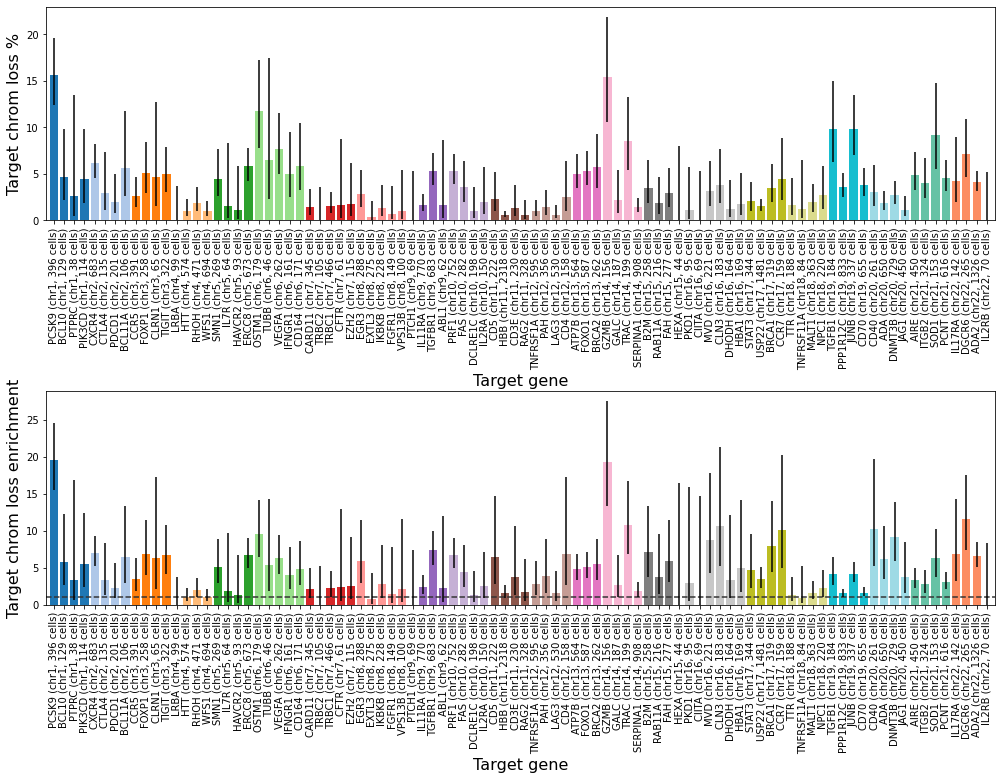

In [14]:
# BASELINE_COL = 'baseline_rate_not_targeted'
BASELINE_COL = 'baseline_rate_targeted_other_chroms'

guide_stats['loss_enrch'] = guide_stats['chrom_loss_rate'] / guide_stats[BASELINE_COL]
guide_stats['loss_enrch_lo'] = guide_stats['chrom_loss_rate_lo'] / guide_stats[BASELINE_COL]
guide_stats['loss_enrch_hi'] = guide_stats['chrom_loss_rate_hi'] / guide_stats[BASELINE_COL]

guide_stats = guide_stats.dropna()
guide_stats['chrom_number'] = guide_stats['chrom'].apply(CHROMS.index)
guide_stats = guide_stats.sort_values('chrom_number')

fig, axes = plt.subplots(nrows = 2, figsize = (17, 11))
fig.subplots_adjust(hspace = 0.8)

x = np.arange(len(guide_stats))
y = 100 * guide_stats['chrom_loss_rate'].values
y_lo = 100 * guide_stats['chrom_loss_rate_lo'].values
y_hi = 100 * guide_stats['chrom_loss_rate_hi'].values
names = guide_stats['target'].values
chroms = guide_stats['chrom'].values
chrom_numbers = guide_stats['chrom_number'].values
colors = [plt.cm.tab20(chr_n) if chr_n < 20 else plt.cm.Set2(chr_n - 20) for chr_n in chrom_numbers]

ax = axes[0]
ax.bar(x, y, yerr = (y - y_lo, y_hi - y), color = colors)
ax.set_xticks(x)
ax.set_xticklabels(['%s (%s, %d cells)' % (name, chrom, n_cells) for name, chrom, n_cells in \
        zip(names, chroms, guide_stats['n_cells'].values)], rotation = 90)
ax.set_xlim((-0.75, x[-1] + 0.75))
ax.set_xlabel('Target gene', fontsize = 16)
ax.set_ylabel('Target chrom loss %', fontsize = 16)

y = guide_stats['loss_enrch'].values
y_lo = guide_stats['loss_enrch_lo'].values
y_hi = guide_stats['loss_enrch_hi'].values

ax = axes[1]
ax.axhline(1, color = '#333333', linestyle = '--')
ax.bar(x, y, yerr = (y - y_lo, y_hi - y), color = colors)
ax.set_xticks(x)
ax.set_xticklabels(['%s (%s, %d cells)' % (name, chrom, n_cells) for name, chrom, n_cells in \
        zip(names, chroms, guide_stats['n_cells'].values)], rotation = 90)
ax.set_xlim((-0.75, x[-1] + 0.75))
ax.set_xlabel('Target gene', fontsize = 16)
ax.set_ylabel('Target chrom loss enrichment', fontsize = 16)

In [16]:
!wget "http://hgdownload.cse.ucsc.edu/goldenPath/hg38/database/cytoBand.txt.gz" -P /data/aneuploidy/

--2022-12-05 12:55:00--  http://hgdownload.cse.ucsc.edu/goldenPath/hg38/database/cytoBand.txt.gz
Resolving hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11538 (11K) [application/x-gzip]
Saving to: ‘/data/aneuploidy/cytoBand.txt.gz’

cytoBand.txt.gz     100%[===================>]  11.27K  --.-KB/s    in 0.03s   

2022-12-05 12:55:00 (407 KB/s) - ‘/data/aneuploidy/cytoBand.txt.gz’ saved [11538/11538]



In [17]:
cytobands = pd.read_csv('/data/aneuploidy/cytoBand.txt.gz', sep = '\t', names = ['chrom', 'start', 'end', 'band', \
        'type'])
chrom_lengths = cytobands.groupby('chrom')['end'].max()
centromere_locs = cytobands[cytobands['band'].isin({'p11', 'p11.1', 'p11.11'})].set_index('chrom')['end']
gene_locs['centromere_dist'] = np.minimum(np.abs(gene_locs['start'] - gene_locs['chrom'].map(centromere_locs)), \
        np.abs(gene_locs['end'] - gene_locs['chrom'].map(centromere_locs)))
gene_locs['relative_centromere_dist'] = gene_locs['centromere_dist'] / gene_locs['chrom'].map(chrom_lengths)
guide_stats['centromere_dist'] = guide_stats['target'].map(gene_locs.set_index('gene')['centromere_dist'])
guide_stats['relative_centromere_dist'] = guide_stats['target'].map(gene_locs.set_index('gene')\
        ['relative_centromere_dist'])

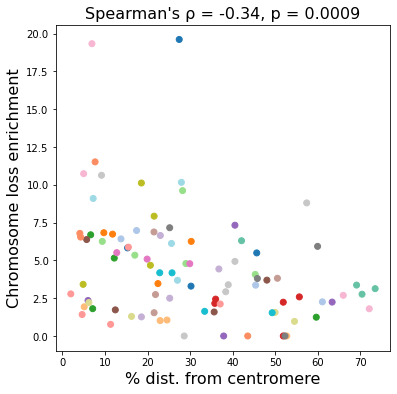

In [18]:
# x = guide_stats['centromere_dist']
x = 100 * guide_stats['relative_centromere_dist']

y = guide_stats['loss_enrch']
# y = guide_stats['loss_enrch_lo']
# y = guide_stats['chrom_loss_rate_lo']

fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(x, y, c = colors)
ax.set_xlabel('% dist. from centromere', fontsize = 16)
ax.set_ylabel('Chromosome loss enrichment', fontsize = 16)
# ax.set_ylabel('Chrom loss enrichment (lower bound)', fontsize = 16)
# ax.set_ylabel('Chrom loss rate (lower bound)', fontsize = 16)
ax.set_title('Spearman\'s ρ = %.2f, p = %.1g' % spearmanr(x, y), fontsize = 16)

fig.savefig('/data/figs/dist_from_centromere_vs_chrom_loss_enr', dpi = 1000)

In [ ]:
# guide_stats.to_csv('/data/aneuploidy/guide_stats.csv', index = False)
guide_stats.to_csv('/data/aneuploidy/guide_stats_not_agg.csv', index = False)

# Cell cycle differences

In [36]:
# From Macosko et al., Cell, 2015
!wget "https://ars.els-cdn.com/content/image/1-s2.0-S0092867415005498-mmc2.xlsx" -O /data/Macosko15_mmc2_cell_cycle_genes.xlsx

--2023-01-18 08:07:29--  https://ars.els-cdn.com/content/image/1-s2.0-S0092867415005498-mmc2.xlsx
Resolving ars.els-cdn.com (ars.els-cdn.com)... 104.18.12.210, 104.18.13.210, 2606:4700::6812:cd2, ...
Connecting to ars.els-cdn.com (ars.els-cdn.com)|104.18.12.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41753 (41K) [application/excel]
Saving to: ‘/data/Macosko15_mmc2_cell_cycle_genes.xlsx’

/data/Macosko15_mmc 100%[===================>]  40.77K  --.-KB/s    in 0.03s   

2023-01-18 08:07:30 (1.36 MB/s) - ‘/data/Macosko15_mmc2_cell_cycle_genes.xlsx’ saved [41753/41753]



In [34]:
'''
Based on Francois's code from: https://gist.github.com/francois-a/6c46e10991bb2bc8c3c3738fefa71d49
'''

# From Macosko et al., Cell, 2015
CELL_CYCLE_GENES_FILE_PATH = '/data/Macosko15_mmc2_cell_cycle_genes.xlsx'

def load_cell_cycle_genes():
    cell_cycles_genes = pd.read_excel(CELL_CYCLE_GENES_FILE_PATH, sheet_name = 'Gene Sets Used in Analysis')
    cell_cycles_genes = cell_cycles_genes.applymap(lambda value: value.strip() if isinstance(value, str) \
            else np.NaN)
    return {cell_cycle: set(cell_cycle_genes.dropna().unique()) for cell_cycle, cell_cycle_genes in \
            cell_cycles_genes.iteritems()}

def score_cell_cycle(adata, cell_cycle_genes, normalize_cells = True, inplace = False):
    
    """
    Compute cell cycle scores as described in Macosko et al., Cell, 2015.
    Assumes that adata.X is in log(CP10K + 1) units (i.e., transformed with sc.pp.normalize_total and sc.pp.log1p).
    """
    
    import scipy
    
    # gene_names = adata.var['gene_name']
    gene_names = adata.var.index
    
    cell_cycle_scores = {}
    
    for cell_cycle, cell_cycle_genes in cell_cycle_genes.items():
        
        # Shape: cells x genes
        X = adata.X[:, gene_names.isin(cell_cycle_genes)]
        
        if isinstance(X, scipy.sparse.csr.csr_matrix):
            X = X.todense()
            
        X = np.array(X)
        
        # Average across marker genes.
        mu = X.mean(axis = 1) # Shape: cells
        mu0 = mu - mu.mean() # Shape: cells
        
        # Filter genes by correlation to average.
        # Shape: cells x genes
        X0 = X - X.mean(axis = 0) 
        # Correlation between X and mu across cells (for each gene).
        # Shape: genes
        r = np.sum(X0 * mu0.reshape(-1, 1), axis = 0) / np.sqrt(np.sum(np.power(X0, 2), axis = 0) * \
                np.sum(np.power(mu0, 2)))
        mask = (r > 0.3)
        
        scores = X[:, mask].mean(axis = 1)
        cell_cycle_scores[cell_cycle.replace('/', '_')] = (scores - scores.mean()) / scores.std()
    
    cell_cycle_scores = pd.DataFrame(cell_cycle_scores, index = adata.obs.index)

    # Label cells with z < 0 for all scores as non-cycling
    G0_mask = (cell_cycle_scores < 0).all(axis = 1)

    if normalize_cells:
        cell_cycle_scores -= np.mean(cell_cycle_scores.values, axis = 1, keepdims = True)
        cell_cycle_scores /= np.std(cell_cycle_scores.values, axis = 1, keepdims = True)

    cell_cycle_scores['phase'] = cell_cycle_scores.idxmax(axis = 1)
    cell_cycle_scores.loc[G0_mask, 'phase'] = 'G0'

    if inplace:
        for column, column_values in cell_cycle_scores.iteritems():
            adata.obs[column] = column_values
    else:
        return cell_cycle_scores
    
cell_cycle_genes = load_cell_cycle_genes()
print('Loaded %d cell cycle genes.' % len(cell_cycle_genes))
score_cell_cycle(adata, cell_cycle_genes, inplace = True)
print('Phases: %s' % adata.obs['phase'].value_counts().to_dict())

In [20]:
def get_single_true_column_per_row(df):
    row_indices, col_indices = np.nonzero(df.values)
    assert (row_indices == np.arange(len(df))).all()
    return df.columns[col_indices]

filtered_adata = adata[loss_mask_per_chrom.index]

n_lost_chroms_per_cell = loss_mask_per_chrom.sum(axis = 1)
single_loss_mask = (n_lost_chroms_per_cell == 1)
chrom_loss_status_per_cell = pd.Series(index = loss_mask_per_chrom.index, dtype = object)
chrom_loss_status_per_cell[n_lost_chroms_per_cell == 0] = 'no_loss'
chrom_loss_status_per_cell[single_loss_mask] = get_single_true_column_per_row(loss_mask_per_chrom[single_loss_mask])
chrom_loss_status_per_cell[n_lost_chroms_per_cell > 1] = 'multiple_loss'

index_per_loss_status = {loss_status: loss_status_values.index for loss_status, loss_status_values in \
        chrom_loss_status_per_cell.groupby(chrom_loss_status_per_cell)}
index_per_cell_cycle_phase = {phase: phase_values.index for phase, phase_values in \
        adata.obs['phase'].groupby(adata.obs['phase'])}
n_cells_per_condition = pd.DataFrame(index = sorted(index_per_loss_status.keys()), \
        columns = sorted(index_per_cell_cycle_phase.keys()))

for loss_status, loss_status_index in index_per_loss_status.items():
    for phase, phase_index in index_per_cell_cycle_phase.items():
        n_cells_per_condition.loc[loss_status, phase] = len(set(loss_status_index) & set(phase_index))
        
display(n_cells_per_condition)

G0   G1_S  G2_M     M   M_G1      S
chr1             424    120    85    26     60     83
chr10            579     66    45    26     41     53
chr11            265     29    42    17     25     21
chr12            252     39    25     7     16     17
chr13            612     51    51    39    106     74
chr14            507     74    59    34     39     71
chr15            355     37    39     9     16     15
chr16            197     47    56    16     24     21
chr17            229     33    51    13     26     38
chr18            835     18    64   132     76     44
chr19           1379    577  1468   194     80    190
chr2             574     94    97    27     64     70
chr20            211     36    32     3     22     12
chr21           1313     82   303   174    100    146
chr22            646    108   271    40     24     48
chr3             468     68    53    36     45     62
chr4             659     43    56    25     35     32
chr5             576    100    83    26     37     72
chr6             646    143   152    95    115     66
chr7             319     55    87    26     28     43
chr8             363     22    81    28     11     30
chr9             353    108   101    21     57     51
multiple_loss   3365    487  1543   165    172    158
no_loss        32435  11382  9420  7362  11069  10567

In [21]:
n_cells_per_condition.sum().sum(), len(loss_mask_per_chrom)

(108458, 108458)

In [22]:
n_cells_per_condition_to_plot = n_cells_per_condition.copy()

# n_cells_per_condition_to_plot = pd.concat([n_cells_per_condition.loc[['no_loss', 'multiple_loss']], \
#         n_cells_per_condition.loc[['chr%d' % (i + 1) for i in range(22)]].sum(axis = 0).rename('single_loss')\
#        .to_frame().transpose()])
# display(n_cells_per_condition_to_plot)

Text(0.5, 1.0, 'Cell-cycle phases per chromosomal loss status')

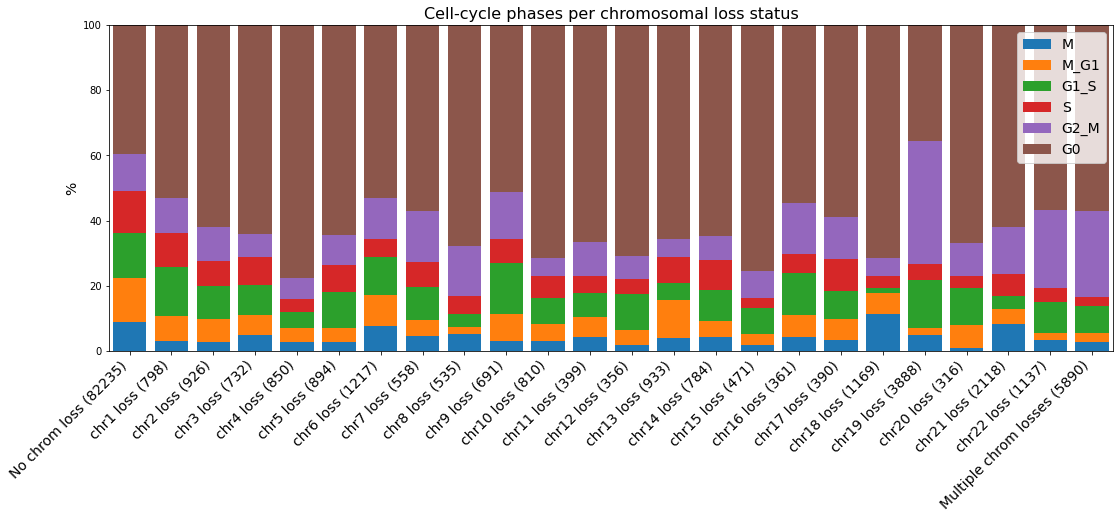

In [23]:
CHROM_LOSS_STATUSES = [('no_loss', 'No chrom loss')] + [(chrom, '%s loss' % chrom) for chrom in \
        ('chr%d' % (i + 1) for i in range(22))] + [('multiple_loss', 'Multiple chrom losses')]
# CHROM_LOSS_STATUSES = [('no_loss', 'No chrom loss'), ('single_loss', 'Single chrom loss'), \
#         ('multiple_loss', 'Multiple chrom losses')]
CELL_CYCLE_PHASES = ['M', 'M_G1', 'G1_S', 'S', 'G2_M', 'G0']

chrom_loss_status_keys, chrom_loss_status_names = map(list, zip(*CHROM_LOSS_STATUSES))
total_cells_per_loss_status = n_cells_per_condition_to_plot.sum(axis = 1)
pct_cells_per_condition = 100 * n_cells_per_condition_to_plot.div(total_cells_per_loss_status, axis = 0)
x = np.arange(len(pct_cells_per_condition))
y = np.zeros(len(pct_cells_per_condition))
fig, ax = plt.subplots(figsize = (18, 6))
# fig, ax = plt.subplots(figsize = (4, 6))

for phase in CELL_CYCLE_PHASES:
    y_diff = pct_cells_per_condition.loc[chrom_loss_status_keys, phase].values.astype(float)
    ax.bar(x, y_diff, bottom = y, label = phase)
    y += y_diff
    
ax.set_xticks(x)
ax.set_xticklabels(['%s (%d)' % (status_name, n_cells) for status_name, n_cells in zip(chrom_loss_status_names, \
        total_cells_per_loss_status[chrom_loss_status_keys])], rotation = 45, ha = 'right', fontsize = 14)
ax.set_xlim((-0.5, len(pct_cells_per_condition) - 0.5))
ax.set_ylim((0, 100))
ax.set_ylabel('%', fontsize = 14)
ax.legend(fontsize = 14, loc = 'upper right')
ax.set_title('Cell-cycle phases per chromosomal loss status', fontsize = 16)

In [104]:
n_cells_per_condition.to_csv('/data/aneuploidy/n_cells_per_chrom_loss_and_cell_cycle_status.csv')

# Total counts in chrom loss

In [ ]:
adata.var['chrom'] = adata.var.index.map(gene_to_chrom)
adata.obsm['expr_chrom_sum'] = pd.DataFrame(index = adata.obs.index)

for chrom in ('chr%d' % (i + 1) for i in range(22)):
    chrom_expr_values = adata.X[:, adata.var['chrom'] == chrom]
    adata.obsm['expr_chrom_sum'][chrom] = chrom_expr_values.sum(axis = 1)

In [212]:
expr_chrom_sum = adata.obsm['expr_chrom_sum'].loc[loss_mask_per_chrom.index]
chroms = adata.obsm['expr_chrom_sum'].columns
sum_expr_other_chroms_loss = []
sum_expr_other_chroms_no_loss = []

for loss_chrom in chroms:
    loss_mask = loss_mask_per_chrom[loss_chrom]
    other_chroms = [chrom for chrom in chroms if chrom != loss_chrom]
    sum_expr_other_chroms = expr_chrom_sum[other_chroms].sum(axis = 1)
    sum_expr_other_chroms_loss.append(sum_expr_other_chroms[loss_mask].values)
    sum_expr_other_chroms_no_loss.append(sum_expr_other_chroms[~loss_mask].values)

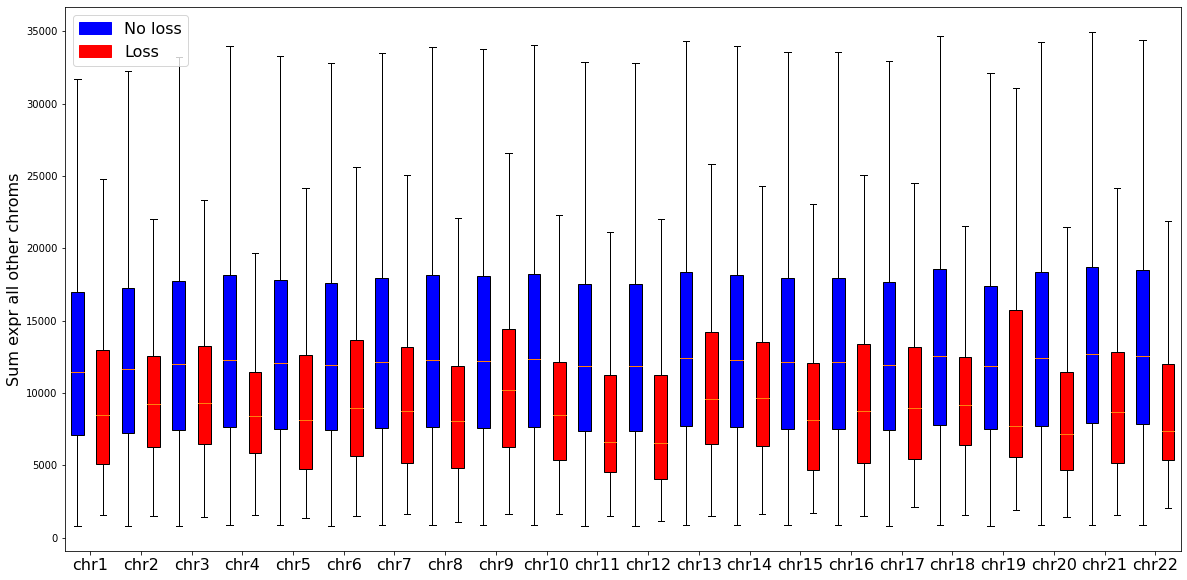

In [239]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize = (20, 10))

x = np.arange(0, 2 * len(chroms), 2)
no_loss_boxes = ax.boxplot(sum_expr_other_chroms_no_loss, positions = x, showfliers = False, patch_artist = True)
loss_boxes = ax.boxplot(sum_expr_other_chroms_loss, positions = x + 1, showfliers = False, patch_artist = True)
ax.set_xticks(x + 0.5)
ax.set_xticklabels(chroms, fontsize = 16)
ax.set_ylabel('Sum expr all other chroms', fontsize = 16)

plt.setp(no_loss_boxes['boxes'], facecolor = 'blue')
plt.setp(loss_boxes['boxes'], facecolor = 'red')

ax.legend(handles = [Patch(color = 'blue', label = 'No loss'), Patch(color = 'red', label = 'Loss')], fontsize = 16)

# Differential gene expression analysis

## Preparations (only needed once)

In [84]:
dge_adata = adata[loss_mask_per_chrom.index].copy()

In [85]:
dge_adata.var['chrom'] = dge_adata.var.index.map(gene_to_chrom)
dge_adata.obsm['expr_chrom_sum'] = pd.DataFrame(index = dge_adata.obs.index)

for chrom in ('chr%d' % (i + 1) for i in range(22)):
    chrom_expr_values = dge_adata.X[:, dge_adata.var['chrom'] == chrom]
    dge_adata.obsm['expr_chrom_sum'][chrom] = chrom_expr_values.sum(axis = 1)

dge_adata.obsm['normed_expr_chrom_sum'] = dge_adata.obsm['expr_chrom_sum'].div(dge_adata.obsm['expr_chrom_sum']\
        .sum(axis = 1), axis = 0)

In [86]:
loss_mask_per_chrom.to_csv('/data/aneuploidy/loss_mask_per_chrom.csv')
dge_adata.write('/data/aneuploidy/dge_adata.h5ad')

... storing 'chrom' as categorical


In [ ]:
!pip uninstall memento --yes
!pip install git+https://github.com/yelabucsf/scrna-parameter-estimation.git@release-v0.0.8

## Run memento

In [ ]:
# Before running, restart the kernel to free as much memory as possible

import gc
import subprocess

import numpy as np
import pandas as pd
import scanpy as sc
from IPython.display import display

import memento

N_COVARIATE_BINS = 10

CHROMS = ['chr%d' % i for i in range(1, 23)]

gene_locs = pd.read_csv('/data/aneuploidy/inferCNVgeneName.txt', sep = '\t', names = ['gene', 'chrom', 'start', 'end'])
gene_to_chrom = gene_locs.set_index('gene')['chrom']

loss_mask_per_chrom = pd.read_csv('/data/aneuploidy/loss_mask_per_chrom.csv', index_col = 0)

dge_results = []

for loss_chrom in CHROMS:
    for diff_chrom in CHROMS:
        
        print('Testing differentially expressed genes on %s in %s loss...' % (diff_chrom, loss_chrom))
        print(subprocess.check_output('free -h'.split(' ')).decode('utf8'))

        dge_adata = sc.read('/data/aneuploidy/dge_adata.h5ad')
        dge_adata = dge_adata[:, dge_adata.var['chrom'] == diff_chrom].copy()
        print('Testing %d genes...' % len(dge_adata.var))
        
        dge_adata.obs['capture_rate'] = 0.07
        memento.setup_memento(dge_adata, q_column = 'capture_rate')
        
        condition_col = '%s_loss' % loss_chrom
        dge_adata.obs[condition_col] = loss_mask_per_chrom[loss_chrom].astype(int)
        
        # covariate_col = '%s_relative_expr' % diff_chrom
        # covariate_values = pd.qcut(dge_adata.obsm['normed_expr_chrom_sum'][diff_chrom], N_COVARIATE_BINS)
        covariate_col = '%s_total_expr' % diff_chrom
        covariate_values = pd.qcut(dge_adata.obsm['expr_chrom_sum'][diff_chrom], N_COVARIATE_BINS)
        
        covariate_values = covariate_values.map({interval: i for i, interval in \
                enumerate(covariate_values.cat.categories)}).astype(int)
        dge_adata.obs[covariate_col] = covariate_values
        
        memento.create_groups(dge_adata, label_columns = [condition_col, covariate_col])
        memento.compute_1d_moments(dge_adata)

        groups = memento.get_groups(dge_adata)
        covaritates = groups[[covariate_col]].copy()
        covaritates['intercept'] = 1

        memento.ht_1d_moments(
            dge_adata,
            treatment = groups[[condition_col]],
            covariate = covaritates,
            resampling = 'bootstrap',
            num_boot = 5000,
            verbose = 1,
            num_cpus = 25,
        )

        dge_results.append(memento.get_1d_ht_result(dge_adata))

        del dge_adata
        gc.collect()
    
dge_results = pd.concat(dge_results).reset_index(drop = True)
dge_results['fdr_dePval'] = memento.util._fdrcorrect(dge_results['de_pval'])
dge_results['fdr_dvPval'] = memento.util._fdrcorrect(dge_results['dv_pval'])
dge_results['gene_chrom'] = dge_results['gene'].map(gene_to_chrom)

display(dge_results.sort_values('de_pval'))

In [4]:
# v1 - naive
# v2 - with ('%s_relative_expr' % diff_chrom) as a covariate
# v3 - with ('%s_total_expr' % diff_chrom) as a covariate 
dge_results.to_csv('/data/aneuploidy/dge_results_v3.csv', index = False)

## Analyze the results

In [44]:
dge_results = pd.read_csv('/data/aneuploidy/dge_results_v3.csv')
display(dge_results)

gene          tx   de_coef     de_se   de_pval   dv_coef  \
0       LINC01409   chr1_loss  0.181372  0.090504  0.057788  0.109801   
1           NOC2L   chr1_loss  0.102450  0.077443  0.199960  0.151295   
2           ISG15   chr1_loss -0.030129  0.053921  0.586683  0.269994   
3        C1orf159   chr1_loss  0.154736  0.086321  0.080784  0.113627   
4            SDF4   chr1_loss -0.036524  0.073992  0.626475  0.168396   
...           ...         ...       ...       ...       ...       ...   
174336       LMF2  chr22_loss  0.004551  0.062260  0.938812 -0.052766   
174337     NCAPH2  chr22_loss -0.056554  0.052324  0.308338 -1.117524   
174338       SCO2  chr22_loss -0.358959  0.071411  0.000119 -0.218471   
174339       TYMP  chr22_loss -0.225201  0.065608  0.003574  0.282250   
174340       CHKB  chr22_loss  0.080832  0.047861  0.109578  0.131992   

           dv_se   dv_pval  fdr_dePval  fdr_dvPval gene_chrom  
0       0.334546  0.727055    0.112093    0.946635       chr1  
1       0.394164  0.660868    0.306499    0.931716       chr1  
2       0.272779  0.358928    0.694012    0.836688       chr1  
3       0.414074  0.783443    0.147798    0.958917       chr1  
4       0.409398  0.668866    0.727659    0.933051       chr1  
...          ...       ...         ...         ...        ...  
174336  0.435032  0.893421    0.959675    0.980924      chr22  
174337  0.484934  0.021596    0.429763    0.436878      chr22  
174338  0.413826  0.554289    0.000834    0.903742      chr22  
174339  0.253413  0.251350    0.010340    0.788154      chr22  
174340  0.361377  0.676465    0.189713    0.934520      chr22  

[174341 rows x 11 columns]

In [45]:
dge_results['de_sig'] = (dge_results['fdr_dePval'] <= 0.05)
dge_results['de_sig_status'] = (dge_results['de_coef'] > 0).map({True: 1, False: -1}) * \
        dge_results['de_sig'].astype(int)
sum_per_gene = dge_results.set_index(['gene', 'tx'])['de_sig_status'].unstack().sum(axis = 1)
top_genes = sum_per_gene[sum_per_gene.abs() >= 5]
print(len(top_genes), (top_genes > 0).sum())
display(top_genes.sort_values(key = np.abs, ascending = False).head(20))

1203 613


gene
CD70        22.0
ZMAT3       21.0
MDM2        20.0
TRIM22      20.0
DEK        -19.0
MIR34AHG    18.0
PHGDH      -18.0
CD2         18.0
TIGAR       18.0
CCR7        17.0
IER5        17.0
NEAT1       17.0
BAX         16.0
XPC         16.0
CCND2       16.0
CDKN1A      16.0
DRAM1       16.0
TP53INP1    16.0
DDX21      -16.0
F5          16.0
dtype: float64

In [41]:
sum_per_gene.sort_values(key = np.abs, ascending = False).to_csv('/data/aneuploidy/dge_total_gene_scores_v3.csv')

2022-10-17 00:54:20,776 Error fetching enrichment results: KEGG_2021_Human
/home/ssm-user/my_python/lib/python3.8/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
2022-10-17 00:54:25,857 Error fetching enrichment results: KEGG_2021_Human
/home/ssm-user/my_python/lib/python3.8/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


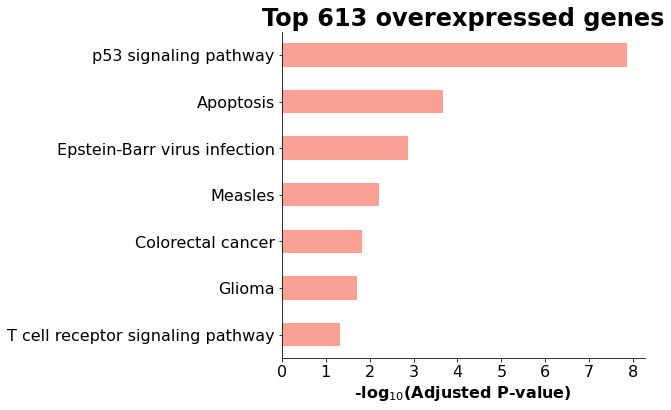

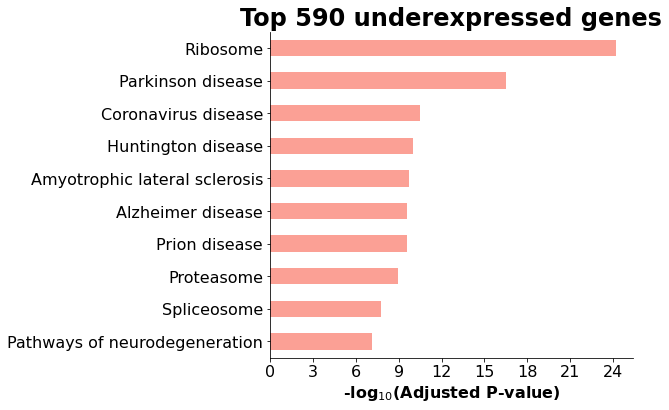

In [10]:
import gseapy as gp

de_genes = list(top_genes[top_genes > 0].index)
enr_title = 'Top %d overexpressed genes' % len(de_genes)
enr = gp.enrichr(gene_list = de_genes, gene_sets = ['KEGG_2021_Human'], organism = 'Human',\
        description = enr_title)
gp.plot.barplot(enr.results, title = enr_title)

de_genes = list(top_genes[top_genes < 0].index)
enr_title = 'Top %d underexpressed genes' % len(de_genes)
enr = gp.enrichr(gene_list = de_genes, gene_sets = ['KEGG_2021_Human'], organism = 'Human',\
        description = enr_title)
gp.plot.barplot(enr.results, title = enr_title)

## Investigate some of the results

In [ ]:
dge_adata = sc.read('/data/aneuploidy/dge_adata.h5ad')
loss_mask_per_chrom = pd.read_csv('/data/aneuploidy/loss_mask_per_chrom.csv', index_col = 0)

In [205]:
sum_per_gene[sum_per_gene == -22]

gene
ABRACL    -22.0
ACAA2     -22.0
ACADM     -22.0
ACTG1     -22.0
ACTR3     -22.0
           ... 
YWHAZ     -22.0
ZBTB8OS   -22.0
ZC3H15    -22.0
ZCCHC9    -22.0
ZCRB1     -22.0
Length: 623, dtype: float64

Gene:


gene_ids                 ENSG00000115091
feature_types            Gene Expression
genome                            GRCh38
mt                                 False
n_cells_by_counts                 184058
mean_counts                      6.04392
pct_dropout_by_counts           9.940599
total_counts                   1235220.0
chrom                               chr2
Name: ACTR3, dtype: object

Gene DGE results:


gene          tx   de_coef     de_se       de_pval   dv_coef  \
1217    ACTR3   chr1_loss -0.192412  0.018427  1.549078e-05  0.014465   
10460   ACTR3   chr2_loss -0.211599  0.015011  2.222584e-04  0.021117   
19553   ACTR3   chr3_loss -0.195860  0.016353  4.710796e-04 -0.258295   
28440   ACTR3   chr4_loss -0.241218  0.013317  2.586104e-04 -0.358335   
37363   ACTR3   chr5_loss -0.244489  0.017362  3.064260e-04  0.165114   
46432   ACTR3   chr6_loss -0.106689  0.012195  7.771900e-05  0.051297   
55905   ACTR3   chr7_loss -0.177605  0.017759  3.474455e-04 -0.111496   
64813   ACTR3   chr8_loss -0.221682  0.019068  1.428948e-04  0.191339   
73629   ACTR3   chr9_loss -0.131820  0.017676  4.196163e-05 -0.082323   
82587   ACTR3  chr10_loss -0.227588  0.014814  1.734409e-04 -0.137840   
91433   ACTR3  chr11_loss -0.257707  0.024310  7.503372e-06  0.163545   
99938   ACTR3  chr12_loss -0.285016  0.028356  1.454022e-05  0.435558   
108447  ACTR3  chr13_loss -0.157671  0.013104  5.266869e-07 -0.230128   
117500  ACTR3  chr14_loss -0.146958  0.017751  5.374551e-04 -0.156660   
126317  ACTR3  chr15_loss -0.253540  0.019891  3.340871e-04 -0.264588   
134926  ACTR3  chr16_loss -0.150170  0.023623  8.471216e-05  0.220630   
143528  ACTR3  chr17_loss -0.139788  0.022036  5.186766e-04  0.154348   
152173  ACTR3  chr18_loss -0.159088  0.011932  2.883840e-04 -0.184298   
161257  ACTR3  chr19_loss -0.047029  0.009846  1.240542e-03  0.448588   
170775  ACTR3  chr20_loss -0.303803  0.026598  3.142506e-06  0.310520   
179191  ACTR3  chr21_loss -0.190700  0.011679  8.226318e-07  0.195148   
188520  ACTR3  chr22_loss -0.223745  0.013584  4.749836e-06  0.280886   

           dv_se   dv_pval  fdr_dePval  fdr_dvPval gene_chrom  de_sig  \
1217    0.099289  0.890422    0.000203    0.978292       chr2    True   
10460   0.106754  0.838632    0.000794    0.966734       chr2    True   
19553   0.141877  0.100980    0.001325    0.582771       chr2    True   
28440   0.114562  0.008598    0.000876    0.164385       chr2    True   
37363   0.090718  0.103379    0.000979    0.588207       chr2    True   
46432   0.064403  0.429914    0.000428    0.844509       chr2    True   
55905   0.132932  0.396721    0.001066    0.830983       chr2    True   
64813   0.091732  0.059588    0.000603    0.476998       chr2    True   
73629   0.132968  0.519296    0.000315    0.879623       chr2    True   
82587   0.095977  0.180164    0.000678    0.690811       chr2    True   
91433   0.121400  0.201360    0.000154    0.709414       chr2    True   
99938   0.118785  0.003799    0.000198    0.093406       chr2    True   
108447  0.087554  0.016197    0.000061    0.245584       chr2    True   
117500  0.117025  0.239352    0.001460    0.739659       chr2    True   
126317  0.158179  0.112777    0.001038    0.604163       chr2    True   
134926  0.104910  0.058788    0.000448    0.474071       chr2    True   
143528  0.124229  0.225755    0.001422    0.729996       chr2    True   
152173  0.080331  0.033393    0.000940    0.368171       chr2    True   
161257  0.032450  0.000016    0.002813    0.003488       chr2    True   
170775  0.132007  0.068186    0.000114    0.503216       chr2    True   
179191  0.052591  0.001051    0.000072    0.040266       chr2    True   
188520  0.054973  0.000258    0.000132    0.015239       chr2    True   

        de_sig_status  
1217               -1  
10460              -1  
19553              -1  
28440              -1  
37363              -1  
46432              -1  
55905              -1  
64813              -1  
73629              -1  
82587              -1  
91433              -1  
99938              -1  
108447             -1  
117500             -1  
126317             -1  
134926             -1  
143528             -1  
152173             -1  
161257             -1  
170775             -1  
179191             -1  
188520             -1

Gene expression values:
[14. 15.  1. ...  2. 10.  7.]


2.0     11323
3.0     11204
4.0     10719
1.0     10083
5.0      9553
        ...  
60.0        2
57.0        1
62.0        1
68.0        1
64.0        1
Length: 64, dtype: int64

Optimization terminated successfully.
         Current function value: 0.059871
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               108458
Model:                          Logit   Df Residuals:                   108455
Method:                           MLE   Df Model:                            2
Date:                Sat, 08 Oct 2022   Pseudo R-squ.:                 0.01588
Time:                        10:18:02   Log-Likelihood:                -6493.4
converged:                       True   LL-Null:                       -6598.2
Covariance Type:            nonrobust   LLR p-value:                 3.227e-46
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9967      0.431     -4.638      0.000      -2.841      -1.153
gene_expr              -0.0921      0.008    -12.192      0.000      -0.107      -0.077
chrom_relative_expr   -24.1045      5.165     -4.667      0.000     -34.227     -13.982
=======================================================================================
"""

const                  3.523953e-06
gene_expr              3.429975e-34
chrom_relative_expr    3.052627e-06
dtype: float64

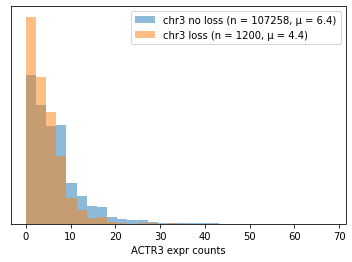

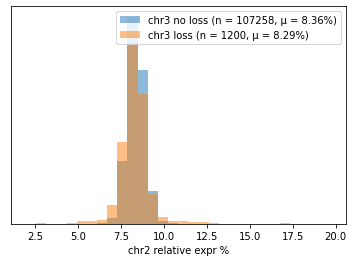

In [206]:
import statsmodels.api as sm

gene = 'ACTR3'
loss_chrom = 'chr3'

print('Gene:')
display(dge_adata.var.loc[gene])
print('Gene DGE results:')
display(dge_results[dge_results['gene'] == gene])

diff_chrom = dge_adata.var.loc[gene, 'chrom']
gene_expr_values = dge_adata[:, gene].X.toarray().flatten()

print('Gene expression values:')
print(gene_expr_values)
display(pd.Series(gene_expr_values).value_counts())

loss_chrom_mask = loss_mask_per_chrom[loss_chrom].values

loss_gene_expr_values = gene_expr_values[loss_chrom_mask]
no_loss_gene_expr_values = gene_expr_values[~loss_chrom_mask]

s1 = no_loss_gene_expr_values
s2 = loss_gene_expr_values

fig, ax = plt.subplots()
_, bins, _ = ax.hist(s1, density = True, bins = 30, alpha = 0.5, label = '%s no loss (n = %d, μ = %.1f)' % \
        (loss_chrom, len(s1), s1.mean()))
ax.hist(s2, density = True, bins = bins, alpha = 0.5, label = '%s loss (n = %d, μ = %.1f)' % \
        (loss_chrom, len(s2), s2.mean()))
ax.set_yticks([])
ax.set_xlabel('%s expr counts' % gene)
ax.legend()

# N_COVARIATE_BINS = 10
# chrom_relative_expr = pd.qcut(dge_adata.obsm['normed_expr_chrom_sum'][diff_chrom], N_COVARIATE_BINS)
# chrom_relative_expr = chrom_relative_expr.map({interval: i for i, interval in \
#         enumerate(chrom_relative_expr.cat.categories)}).astype(int)

chrom_relative_expr = dge_adata.obsm['normed_expr_chrom_sum'][diff_chrom].values
loss_chrom_relative_expr = 100 * chrom_relative_expr[loss_chrom_mask]
no_loss_chrom_relative_expr = 100 * chrom_relative_expr[~loss_chrom_mask]

s1 = no_loss_chrom_relative_expr
s2 = loss_chrom_relative_expr

fig, ax = plt.subplots()
_, bins, _ = ax.hist(s1, density = True, bins = 30, alpha = 0.5, label = '%s no loss (n = %d, μ = %.2f%%)' % \
        (loss_chrom, len(s1), s1.mean()))
ax.hist(s2, density = True, bins = bins, alpha = 0.5, label = '%s loss (n = %d, μ = %.2f%%)' % \
        (loss_chrom, len(s2), s2.mean()))
ax.set_yticks([])
ax.set_xlabel('%s relative expr %%' % diff_chrom)
ax.legend()

X = pd.DataFrame({'gene_expr': gene_expr_values, 'chrom_relative_expr': chrom_relative_expr})
y = pd.Series(loss_chrom_mask).astype(int)

model = sm.Logit(y, sm.add_constant(X))
res = model.fit()
display(res.summary())
display(res.pvalues)

# Analyze cell states

## Prepare the data

In [24]:
filtered_adata = adata[loss_mask_per_chrom.index].copy()
print(filtered_adata.shape)

(108458, 37001)


In [25]:
del adata

In [26]:
sc.pp.filter_genes(filtered_adata, min_cells = 3)
print(filtered_adata.shape)

(108458, 30917)


In [27]:
filtered_adata.layers['counts'] = filtered_adata.X.copy()
sc.pp.normalize_total(filtered_adata, target_sum = 1e4)
sc.pp.log1p(filtered_adata)
sc.pp.highly_variable_genes(filtered_adata, max_mean = 4)
sc.pp.scale(filtered_adata)
sc.pp.pca(filtered_adata, use_highly_variable = True)
print('Filtered into %d cells x %d genes (%d highly-variable genes)' % (filtered_adata.shape + \
        (filtered_adata.var['highly_variable'].sum(),)))

Filtered into 108458 cells x 30917 genes (2745 highly-variable genes)


In [28]:
sc.tl.pca(filtered_adata, use_highly_variable = True)
sc.pp.neighbors(filtered_adata)
sc.tl.louvain(filtered_adata)
sc.tl.umap(filtered_adata)
print('Done.')

Done.


In [29]:
n_lost_chroms_per_cell = loss_mask_per_chrom.sum(axis = 1)
single_loss_mask = (n_lost_chroms_per_cell == 1)
chrom_loss_status_per_cell = pd.Series(index = loss_mask_per_chrom.index, dtype = object)
chrom_loss_status_per_cell[n_lost_chroms_per_cell == 0] = 'no_loss'
chrom_loss_status_per_cell[single_loss_mask] = get_single_true_column_per_row(loss_mask_per_chrom[single_loss_mask])
chrom_loss_status_per_cell[n_lost_chroms_per_cell > 1] = 'multiple_loss'
filtered_adata.obs['chrom_loss_status'] = chrom_loss_status_per_cell.reindex(filtered_adata.obs.index)
display(filtered_adata.obs['chrom_loss_status'].value_counts())

no_loss          82235
multiple_loss     5890
chr19             3888
chr21             2118
chr6              1217
chr18             1169
chr22             1137
chr13              933
chr2               926
chr5               894
chr4               850
chr10              810
chr1               798
chr14              784
chr3               732
chr9               691
chr7               558
chr8               535
chr15              471
chr11              399
chr17              390
chr16              361
chr12              356
chr20              316
Name: chrom_loss_status, dtype: int64

In [30]:
def to_compact_chrom_loss_status(chrom_loss_status):
    if chrom_loss_status in {'no_loss', 'multiple_loss'}:
        return chrom_loss_status
    elif chrom_loss_status.startswith('chr'):
        return 'single_loss'
    else:
        raise ValueError(chrom_loss_status)
        
filtered_adata.obs['compact_chrom_loss_status'] = filtered_adata.obs['chrom_loss_status'].apply(\
        to_compact_chrom_loss_status)
display(filtered_adata.obs['compact_chrom_loss_status'].value_counts())

no_loss          82235
single_loss      20333
multiple_loss     5890
Name: compact_chrom_loss_status, dtype: int64

In [31]:
filtered_adata.write_h5ad('/data/aneuploidy/filtered_adata.h5ad')

## Plot

In [16]:
filtered_adata = sc.read_h5ad('/data/aneuploidy/filtered_adata.h5ad')
# shuffled_filtered_adata = sc.pp.subsample(filtered_adata, fraction = 1, copy = True)
# del shuffled_filtered_adata

In [18]:
filtered_adata.obs['simple_chrom_loss_status'] = filtered_adata.obs['compact_chrom_loss_status'].map(\
        {'single_loss': 'loss', 'multiple_loss': 'loss', 'no_loss': 'no_loss'})

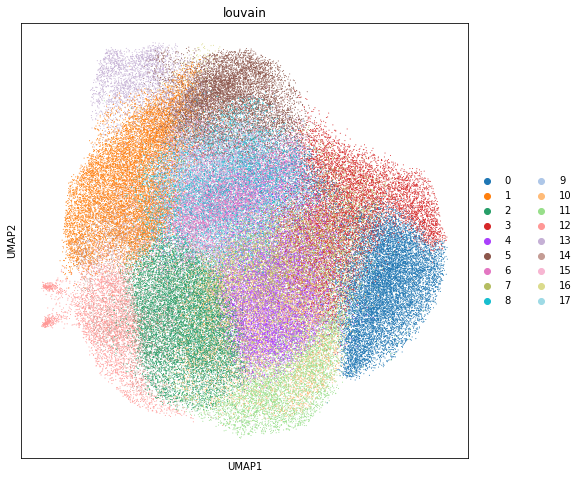

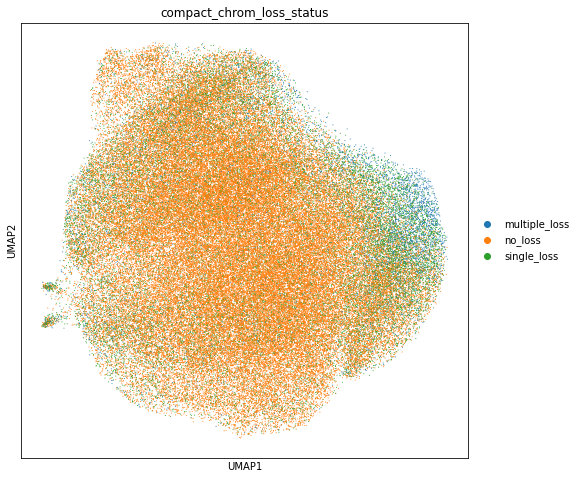

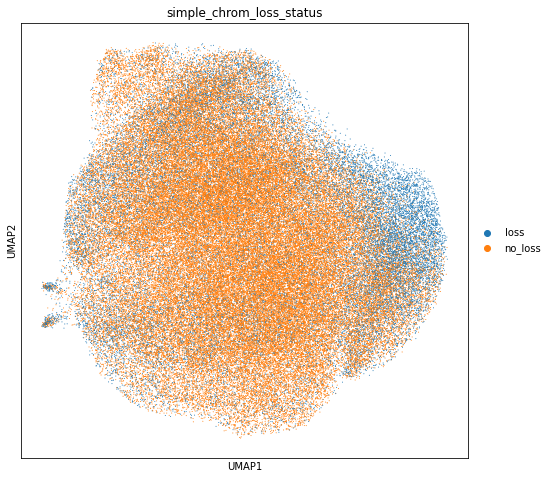

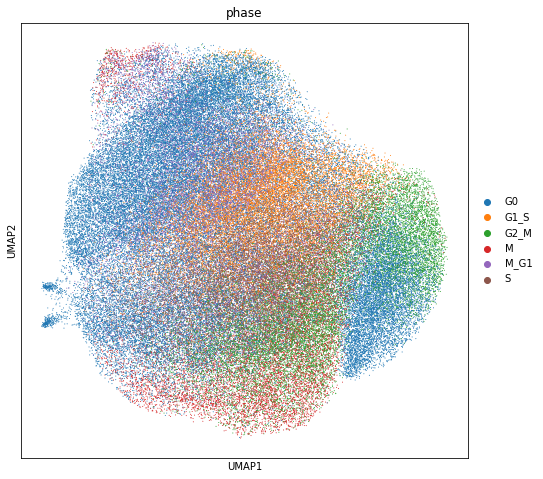

In [20]:
fig, ax = plt.subplots(figsize = (8, 8))
sc.pl.umap(filtered_adata, color = 'louvain', ax = ax, size = 4)

fig, ax = plt.subplots(figsize = (8, 8))
sc.pl.umap(filtered_adata, color = 'compact_chrom_loss_status', ax = ax, size = 4)

fig, ax = plt.subplots(figsize = (8, 8))
sc.pl.umap(filtered_adata, color = 'simple_chrom_loss_status', ax = ax, size = 4)

fig, ax = plt.subplots(figsize = (8, 8))
sc.pl.umap(filtered_adata, color = 'phase', ax = ax, size = 4)

In [72]:
cluster_colors = {str(label_i): plt.cm.tab20(color_i) for label_i, color_i in \
        enumerate([0, 2, 4, 6, 8, 10, 12, 16, 18, 1, 3, 5, 7, 9, 11, 13, 17, 19])}

<AxesSubplot:ylabel='%'>

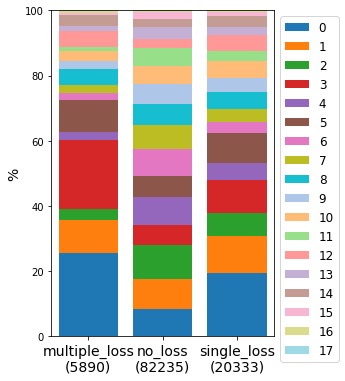

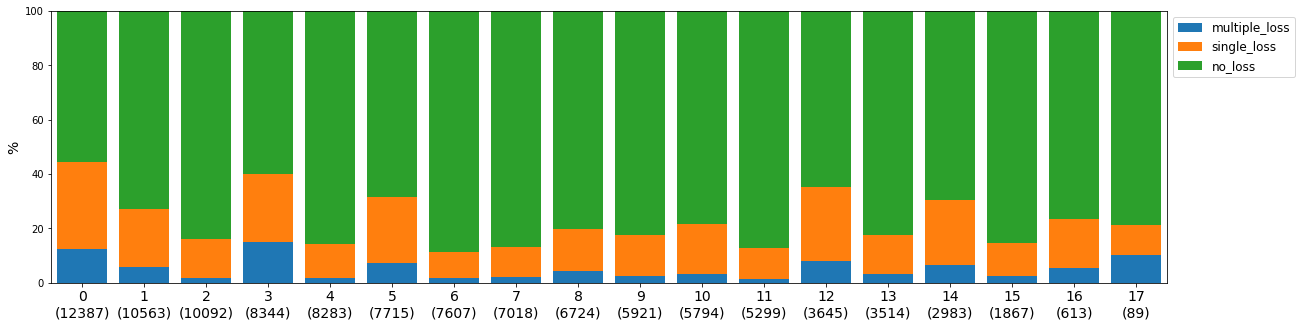

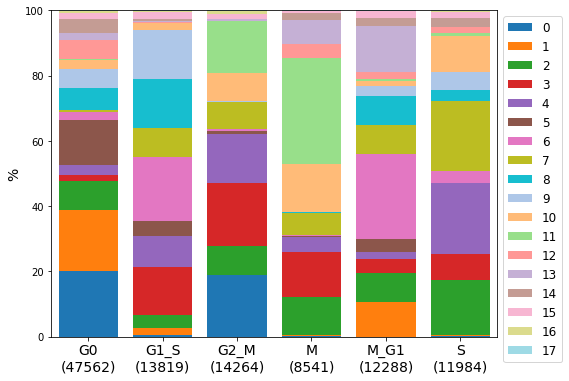

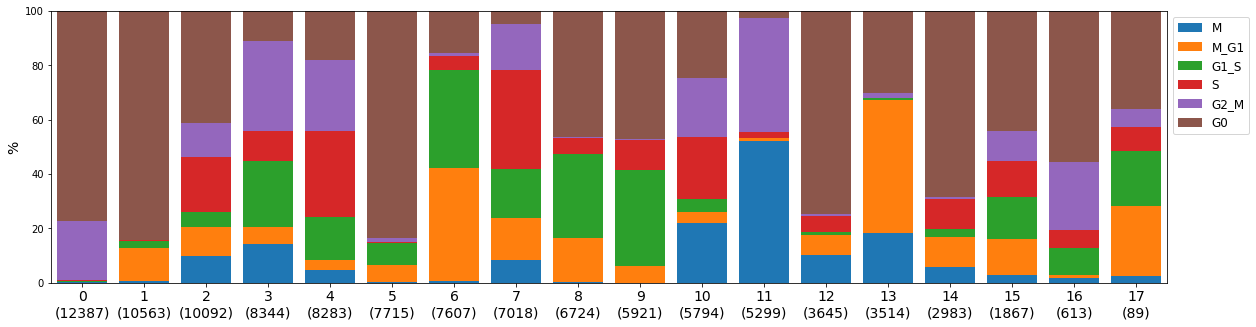

In [104]:
def count_by_two_cols(df, col1, col2):
    return df.groupby([col1, col2]).size().unstack().fillna(0).astype(int)

def plot_conditional_pcts(counts, y_labels = None, y_colors = {}, ax = None, figsize = None):
    
    if y_labels is not None:
        counts = counts.loc[:, y_labels]
    
    total_counts = counts.sum(axis = 1)
    pcts = 100 * counts.div(total_counts, axis = 0)
    
    if ax is None:
        fig, ax = plt.subplots(figsize = figsize)
        
    x = np.arange(len(counts))
    y = np.zeros(len(counts))
    
    for y_label, y_diff in pcts.iteritems():
        y_diff = y_diff.values
        ax.bar(x, y_diff, bottom = y, label = y_label, color = y_colors.get(y_label))
        y += y_diff
        
    ax.set_xlim(-0.5, len(counts) - 0.5)
    ax.set_xticks(x)
    ax.set_xticklabels(['%s\n(%d)' % (label, count) for label, count in total_counts.iteritems()], fontsize = 14)
    ax.set_ylim(0, 100)
    ax.set_ylabel('%', fontsize = 14)
    
    ax.legend(fontsize = 12, loc = 'upper left', bbox_to_anchor = (1.0, 1.0))
        
    return ax
    
counts = count_by_two_cols(filtered_adata.obs, 'compact_chrom_loss_status', 'louvain')
counts.to_csv('/data/aneuploidy/chrom_loss_status_and_cluster_cell_counts.csv')
plot_conditional_pcts(counts, y_colors = cluster_colors, figsize = (4, 6))
plot_conditional_pcts(counts.transpose(), y_labels = ['multiple_loss', 'single_loss', 'no_loss'], figsize = (20, 5))

counts = count_by_two_cols(filtered_adata.obs, 'phase', 'louvain')
counts.to_csv('/data/aneuploidy/cell_cycle_and_cluster_cell_counts.csv')
plot_conditional_pcts(counts, y_colors = cluster_colors, figsize = (8, 6))
plot_conditional_pcts(counts.transpose(), y_labels = ['M', 'M_G1', 'G1_S', 'S', 'G2_M', 'G0'], figsize = (20, 5))

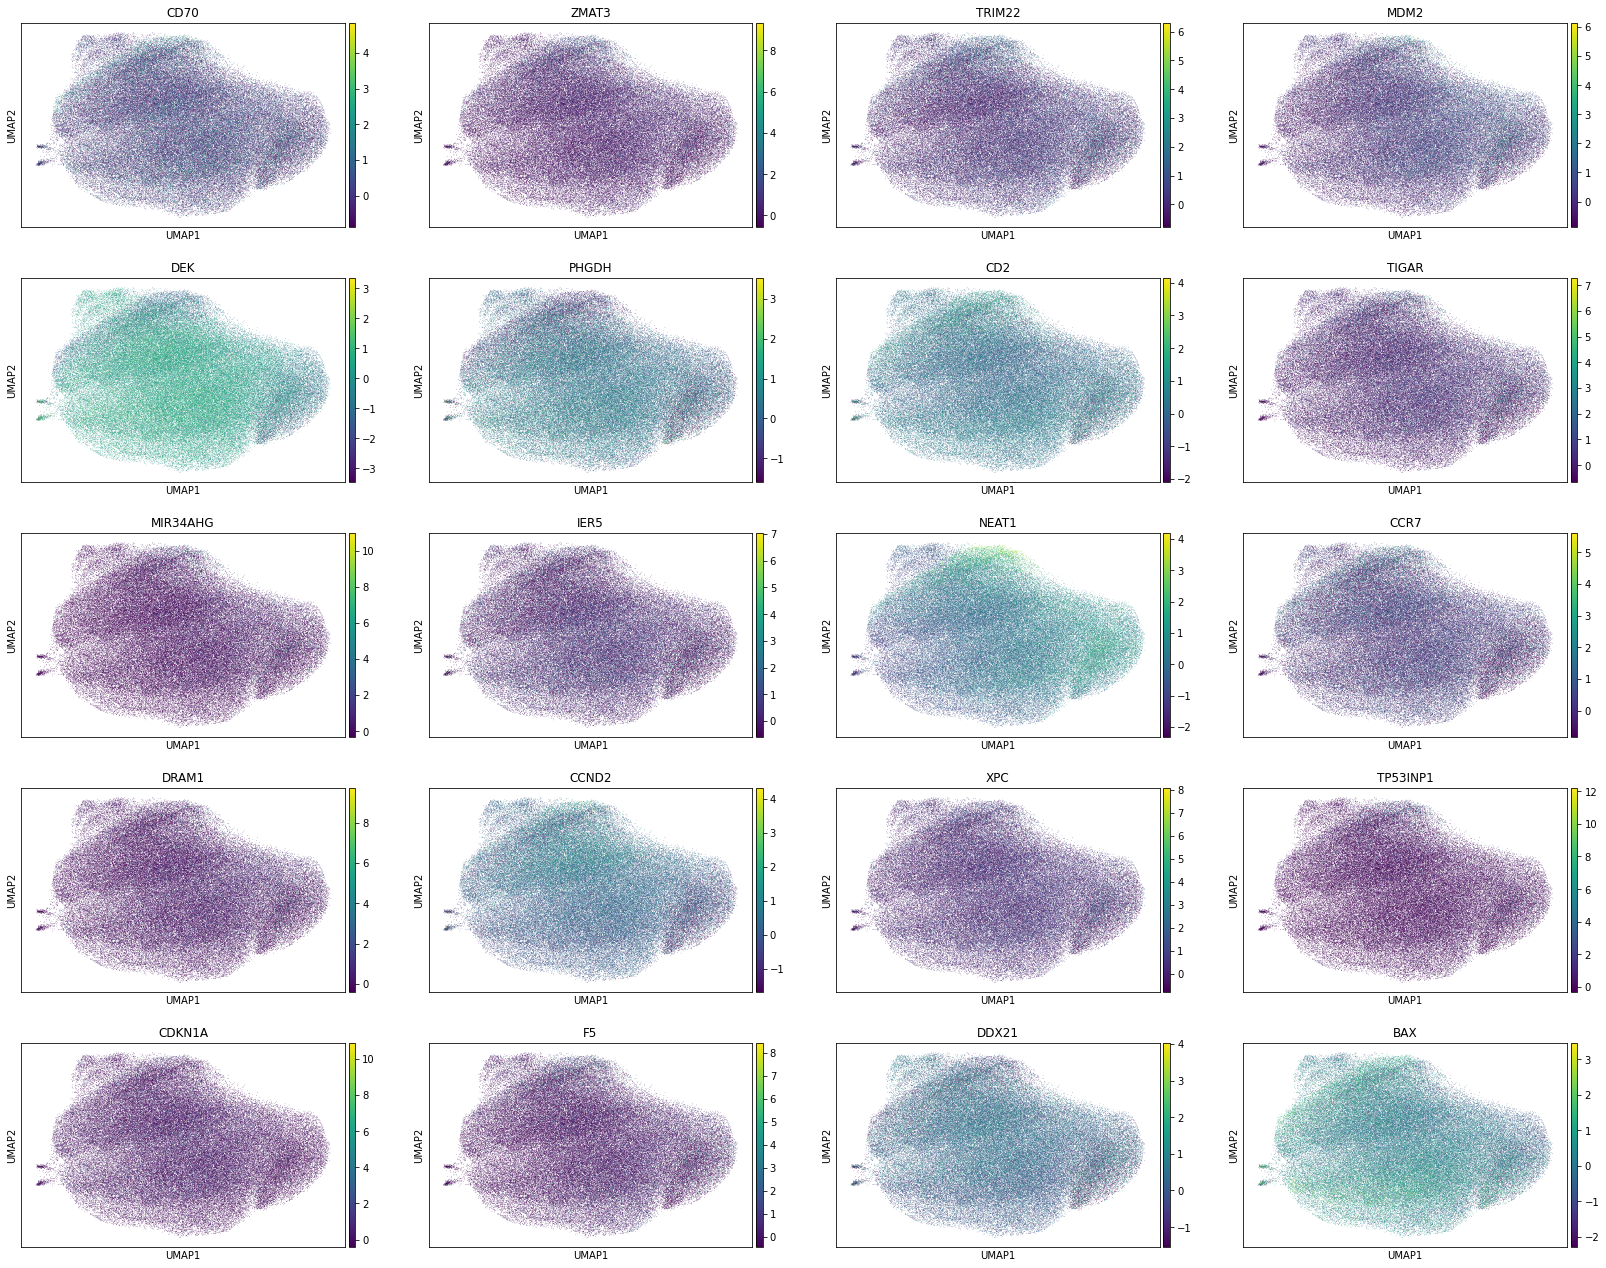

In [42]:
dge_gene_rankings = pd.read_csv('/data/aneuploidy/dge_total_gene_scores_v3.csv', index_col = 0).squeeze()
sc.pl.umap(filtered_adata, color = dge_gene_rankings.head(20).index.values)

# Analyzing the TRAC dataset

Required data files:
* TRAC_Aneuploidy_events.csv
* cas9ProcessedAneuploidyStatus.h5ad

In [19]:
aneuploidy_events = pd.read_csv('/data/aneuploidy/trac_dataset/TRAC_Aneuploidy_events.csv', index_col = 0)
adata = sc.read_h5ad('/data/aneuploidy/trac_dataset/cas9ProcessedAneuploidyStatus.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 24483 × 23213
    obs: 'well', 'batch', 'Barcode', 'demux_type', 'assignment', 'guides', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'chr14_residual_expression', 'chr14SingleChrLoss', 'chr14DoubleChrLoss', 'chr14Status', 'chr14Aneuploidy'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'guides_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', 'well_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


Done.


(0.0, 10000.0)

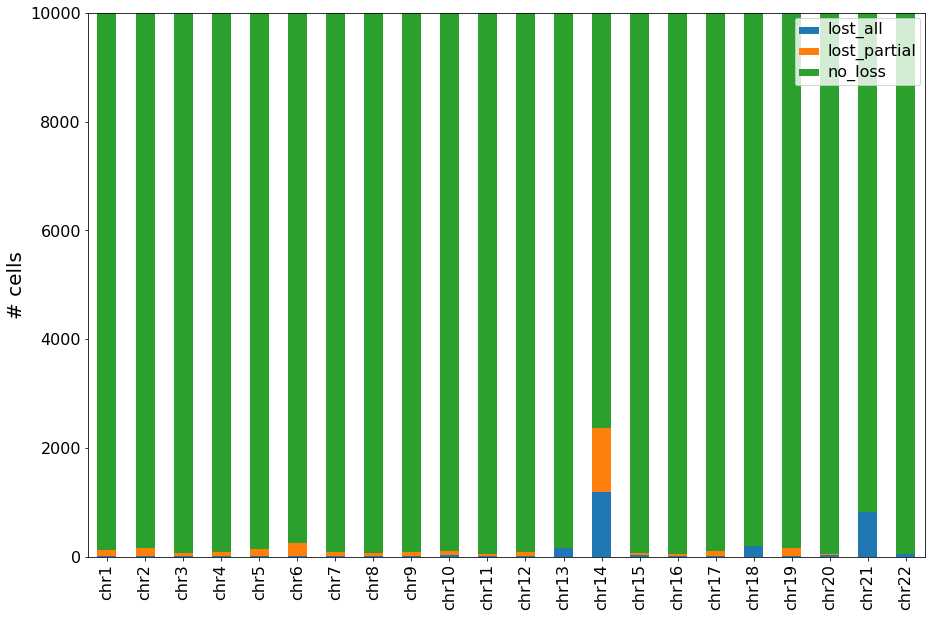

In [20]:
LOSS_FRAC = 0.7
MIN_GENES = 150

for chrom in ('chr%d' % i for i in range(1, 23)):
    
    left_binary = aneuploidy_events['%s_left_binary' % chrom]
    left_n = aneuploidy_events['%s_left_n' % chrom]
    right_binary = aneuploidy_events['%s_right_binary' % chrom]
    right_n = aneuploidy_events['%s_right_n' % chrom]
    total_binary = (left_n * left_binary + right_n * right_binary) / (left_n + right_n)
    
    lost_all = (total_binary <= 1 - LOSS_FRAC)
    lost_left = (left_binary <= 1 - LOSS_FRAC)
    lost_right = (right_binary <= 1 - LOSS_FRAC)
    lost_only_left = lost_left & (~lost_right)
    lost_only_right = lost_right & (~lost_left)
    enough_genes_left = (left_n >= MIN_GENES)
    enough_genes_right = (right_n >= MIN_GENES)
    lost_partial = (lost_only_left & enough_genes_left) | (lost_only_right & enough_genes_right)
    
    event = np.where(lost_partial, 'lost_partial', np.where(lost_all, 'lost_all', 'no_loss'))
    aneuploidy_events['%s_event' % chrom] = event
    
print('Done.')

ax = pd.DataFrame({chrom: aneuploidy_events['%s_event' % chrom].value_counts() for chrom in \
        ('chr%d' % i for i in range(1, 23))}).transpose().fillna(0).astype(int)[['lost_all', 'lost_partial', \
        'no_loss']].plot(kind = 'bar', stacked = True, figsize = (15, 10), ylim = (0, len(aneuploidy_events)), \
        ylabel = '# cells')
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis = 'both', labelsize = 16)
plt.setp(ax.get_legend().get_texts(), fontsize = 16)
ax.set_ylim((0, 10000))

In [21]:
LOSS_EVENT_LABELS = {'lost_all', 'lost_partial'}
CHROMS = ['chr%d' % i for i in range(1, 23)]
loss_mask_per_chrom = pd.DataFrame({chrom: aneuploidy_events['%s_event' % chrom].isin(LOSS_EVENT_LABELS) for \
        chrom in CHROMS})

In [25]:
filtered_adata = adata[loss_mask_per_chrom.index].copy()
del adata

sc.pp.highly_variable_genes(filtered_adata, max_mean = 4)
sc.pp.scale(filtered_adata)
sc.pp.pca(filtered_adata, use_highly_variable = True)
print('Filtered into %d cells x %d genes (%d highly-variable genes)' % (filtered_adata.shape + \
        (filtered_adata.var['highly_variable'].sum(),)))

sc.tl.pca(filtered_adata, use_highly_variable = True)
sc.pp.neighbors(filtered_adata)
sc.tl.louvain(filtered_adata)
sc.tl.umap(filtered_adata)
print('Done.')

Filtered into 24483 cells x 23213 genes (8988 highly-variable genes)
Done.


In [26]:
filtered_adata.write_h5ad('/data/aneuploidy/trac_dataset/filtered_adata.h5ad')

In [37]:
cell_cycle_genes = load_cell_cycle_genes()
score_cell_cycle(filtered_adata, cell_cycle_genes, inplace = True)

/home/ssm-user/my_python/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [31]:
filtered_adata.obs['simple_chr14_loss_status'] = loss_mask_per_chrom['chr14'].map({True: 'chr14_loss', \
        False: 'no_chr14_loss'})

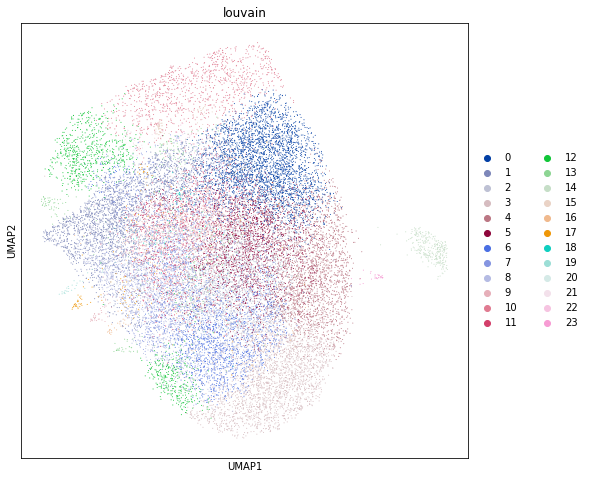

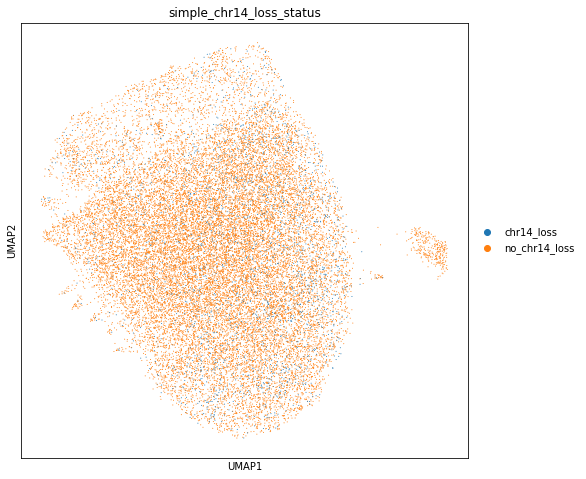

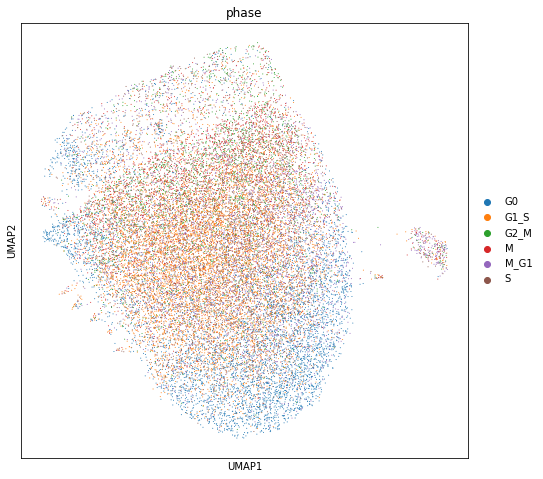

In [38]:
fig, ax = plt.subplots(figsize = (8, 8))
sc.pl.umap(filtered_adata, color = 'louvain', ax = ax, size = 4)

fig, ax = plt.subplots(figsize = (8, 8))
sc.pl.umap(filtered_adata, color = 'simple_chr14_loss_status', ax = ax, size = 4)

fig, ax = plt.subplots(figsize = (8, 8))
sc.pl.umap(filtered_adata, color = 'phase', ax = ax, size = 4)

<AxesSubplot:ylabel='%'>

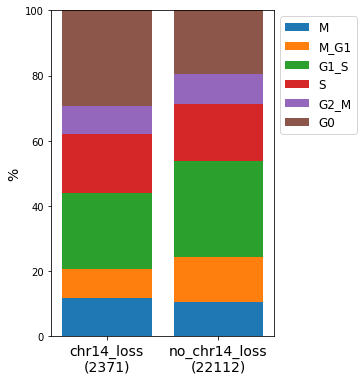

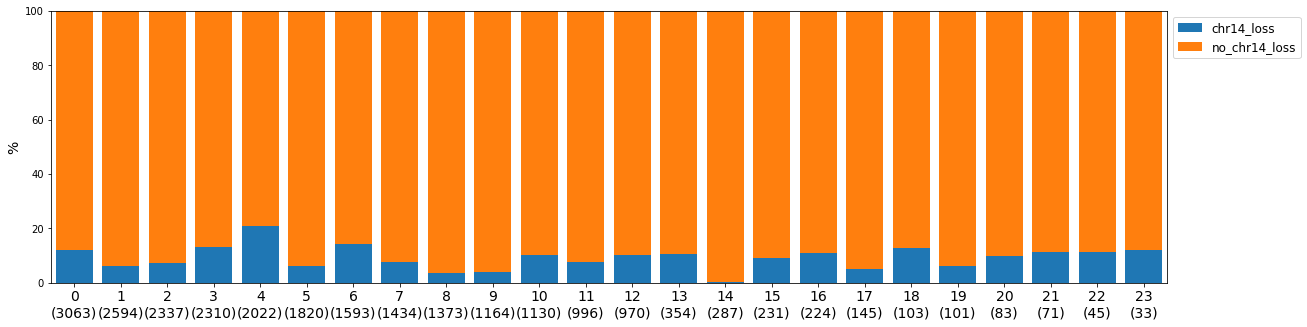

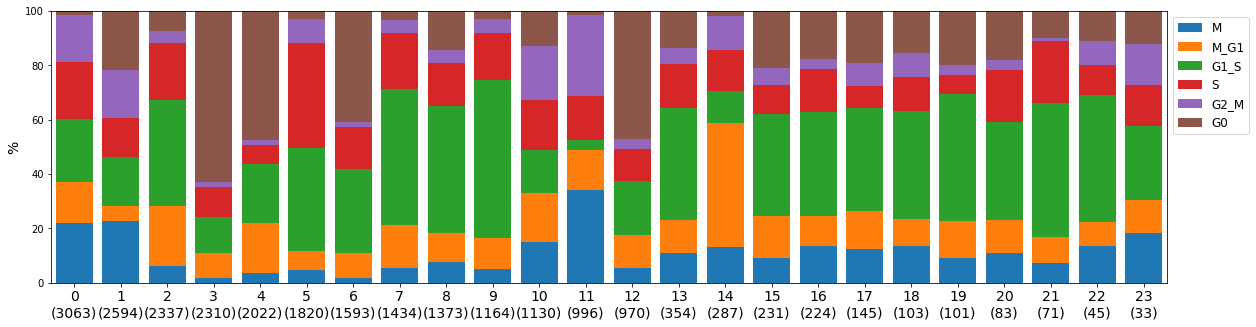

In [53]:
counts = count_by_two_cols(filtered_adata.obs, 'phase', 'simple_chr14_loss_status')
counts.to_csv('/data/aneuploidy/trac_dataset/cell_cycle_and_chrom_loss_status_counts.csv')
plot_conditional_pcts(counts.transpose(), y_labels = ['M', 'M_G1', 'G1_S', 'S', 'G2_M', 'G0'], figsize = (4, 6))

counts = count_by_two_cols(filtered_adata.obs, 'simple_chr14_loss_status', 'louvain')
counts.to_csv('/data/aneuploidy/trac_dataset/chrom_loss_status_and_cluster_cell_counts.csv')
plot_conditional_pcts(counts.transpose(), y_labels = ['chr14_loss', 'no_chr14_loss'], figsize = (20, 5))

counts = count_by_two_cols(filtered_adata.obs, 'phase', 'louvain')
counts.to_csv('/data/aneuploidy/trac_dataset/cell_cycle_and_cluster_cell_counts.csv')
plot_conditional_pcts(counts.transpose(), y_labels = ['M', 'M_G1', 'G1_S', 'S', 'G2_M', 'G0'], figsize = (20, 5))